# Projet 08 : Communiquer des résultats
# Partie 2 : Echantillonnage

---

## <font color=blue>Sommaire</font>

[2. Echantillonnage](#2_0)  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[2.1. Echantillonnage sur une base aléatoire](#2_0)  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[2.2. Echantillonnage basée sur une connaissance métier](#2_2)  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[2.3. Sauvegarde des échantillons](#2_3)  

---
**Importation des librairies**

In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
#import warnings
#warnings.filterwarnings('ignore')

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
import seaborn as sns
import scipy.stats as st
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import model_selection

import modules_perso.sf_graphiques as sfg
import modules_perso.sf_classification_acp as sfca
import modules_perso.sf_modeles_anova as sfma

**Chargement des données partitionnées**

In [4]:
data21 = pd.read_csv("data21jours.csv", index_col=0, parse_dates=["dateref"])
data21["stratify"] = data21.cluster * 1000 + data21.contract_id
data21.set_index(["contract_id", "dateref"], inplace=True)
data21.head()

category_name  somme_signaux  variation_21_standard  \
contract_id dateref                                                          
1           1989-11-01    Currencies              0               0.082215   
            1989-11-02    Currencies              0               0.239948   
            1989-11-03    Currencies              0               0.198553   
            1989-11-06    Currencies              0               0.097800   
            1989-11-07    Currencies              0               0.091391   

                        cluster  top_cluster  stratify  
contract_id dateref                                     
1           1989-11-01        2        False      2001  
            1989-11-02        8        False      8001  
            1989-11-03        2        False      2001  
            1989-11-06        2        False      2001  
            1989-11-07        2        False      2001

In [5]:
data42 = pd.read_csv("data42jours.csv", index_col=0, parse_dates=["dateref"])
data42["stratify"] = data42.cluster * 1000 + data42.contract_id
data42.set_index(["contract_id", "dateref"], inplace=True)
data42.head()

category_name  somme_signaux  variation_42_standard  \
contract_id dateref                                                          
1           1989-11-01    Currencies              0               0.376857   
            1989-11-02    Currencies              0               0.338517   
            1989-11-03    Currencies              0               0.330530   
            1989-11-06    Currencies              0               0.275066   
            1989-11-07    Currencies              0               0.314145   

                        cluster  top_cluster  stratify  
contract_id dateref                                     
1           1989-11-01        6        False      6001  
            1989-11-02        6        False      6001  
            1989-11-03        6        False      6001  
            1989-11-06        6        False      6001  
            1989-11-07        6        False      6001

In [6]:
data64 = pd.read_csv("data64jours.csv", index_col=0, parse_dates=["dateref"])
data64["stratify"] = data64.cluster * 1000 + data64.contract_id
data64.set_index(["contract_id", "dateref"], inplace=True)
data64.head()

category_name  somme_signaux  variation_64_standard  \
contract_id dateref                                                          
1           1989-11-01    Currencies              0               0.057156   
            1989-11-02    Currencies              0               0.105039   
            1989-11-03    Currencies              0              -0.046118   
            1989-11-06    Currencies              0              -0.149538   
            1989-11-07    Currencies              0              -0.227753   

                        cluster  top_cluster  stratify  
contract_id dateref                                     
1           1989-11-01        4        False      4001  
            1989-11-02        4        False      4001  
            1989-11-03        4        False      4001  
            1989-11-06        4        False      4001  
            1989-11-07        4        False      4001

In [7]:
contracts = pd.read_csv("data_contract_names.csv", sep=";", index_col=0)
contracts.head()

,name,currency
contract_id,,
1,AUD,USD
2,CAD,USD
3,CHF,USD
4,EuroFx,USD
5,GBP,USD


<a id='2_0'></a>

---
## <font color=blue>Mission 2 : Echantillonnage</font>

## 2.1. Echantillonnage sur une base aléatoire

### 2.1.1. Génération des échantillons

Je ne conserve que 20% des données en effectuant un échantillonnage qui respecte la proportion de données sur la base du couple (contract_id, cluster).

In [8]:
min(data21.groupby("stratify").cluster.count())

7

In [9]:
x = data21.drop(columns="stratify")
y = data21.stratify.copy()
echant1_data21, other1_data21, train_stratify, test_stratify = \
    model_selection.train_test_split(x, y, train_size=0.2, shuffle=True, stratify=y)

C:\Anaconda3\envs\Jupyter\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [10]:
min(data42.groupby("stratify").cluster.count())

1

Il y a un indice stratify qui n'a qu'une seule valeur. Il faut au moins deux valeurs pour chaque partitionnement qui sert à la stratification. Je cherche le(s) indice(s) de stratification qui n'a (ont) qu'une seule valeur, pour le(s) fusionner avec d'autres plus fournis.

In [11]:
temp = data42.groupby("stratify").cluster.count()
temp[temp<2]

stratify
9018    1
Name: cluster, dtype: int64

In [12]:
data42[data42.stratify==9018]

,,category_name,somme_signaux,variation_42_standard,cluster,top_cluster,stratify
contract_id,dateref,,,,,,
18,2017-08-28,LTIR,-126,-0.311268,9,False,9018


In [13]:
data42[data42.stratify==9017]

,,category_name,somme_signaux,variation_42_standard,cluster,top_cluster,stratify
contract_id,dateref,,,,,,


In [14]:
data42[data42.stratify==9016].head()

category_name  somme_signaux  variation_42_standard  \
contract_id dateref                                                          
16          1994-07-19          LTIR           -225              -0.308538   
            1994-07-22          LTIR           -221              -0.236362   
            1994-07-25          LTIR           -224              -0.249678   
            1994-07-26          LTIR           -215              -0.252787   
            1994-07-28          LTIR           -213              -0.300518   

                        cluster  top_cluster  stratify  
contract_id dateref                                     
16          1994-07-19        9        False      9016  
            1994-07-22        9        False      9016  
            1994-07-25        9        False      9016  
            1994-07-26        9        False      9016  
            1994-07-28        9        False      9016

In [15]:
data42[data42.stratify==9019].head()

category_name  somme_signaux  variation_42_standard  \
contract_id dateref                                                          
19          1991-02-08        Metals           -168              -0.265540   
            1991-02-11        Metals           -175              -0.239585   
            1991-02-12        Metals           -181              -0.258009   
            1991-02-13        Metals           -190              -0.240266   
            1991-02-14        Metals           -195              -0.242529   

                        cluster  top_cluster  stratify  
contract_id dateref                                     
19          1991-02-08        9        False      9019  
            1991-02-11        9        False      9019  
            1991-02-12        9        False      9019  
            1991-02-13        9        False      9019  
            1991-02-14        9        False      9019

Je change l'indice de stratification 9018 en 9016, pour garder la même catégorie d'actifs.

In [16]:
data42.loc[data42[data42.stratify==9018].index.values, "stratify"] = 9016

In [17]:
x = data42.drop(columns="stratify")
y = data42.stratify.copy()
echant1_data42, other1_data42, train_stratify, test_stratify = \
    model_selection.train_test_split(x, y, train_size=0.2, shuffle=True, stratify=y)

C:\Anaconda3\envs\Jupyter\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [18]:
min(data64.groupby("stratify").cluster.count())

45

In [19]:
x = data64.drop(columns="stratify")
y = data64.stratify.copy()
echant1_data64, other1_data64, train_stratify, test_stratify = \
    model_selection.train_test_split(x, y, train_size=0.2, shuffle=True, stratify=y)

C:\Anaconda3\envs\Jupyter\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


### 2.1.2 Vérification de la répartition des signaux

**Clusters basés sur l'évolution des prix à 1 mois**

In [20]:
print("Somme min = {}".format(echant1_data21.somme_signaux.min()))
print("Somme max = {}".format(echant1_data21.somme_signaux.max()))
print("Somme moyenne = {}".format(echant1_data21.somme_signaux.mean()))
print("Somme mediane = {}".format(echant1_data21.somme_signaux.median()))

Somme min = -448
Somme max = 450
Somme moyenne = 101.93921522262251
Somme mediane = 135.0


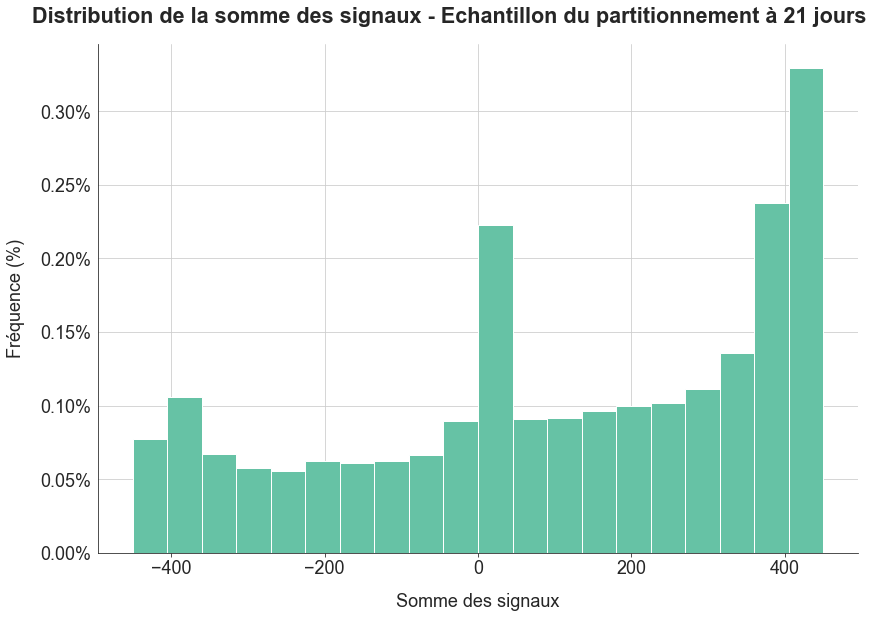

In [21]:
graph31 = sfg.MyGraph(title="Distribution de la somme des signaux - Echantillon du partitionnement à 21 jours")
graph31.add_histogramme(echant1_data21.somme_signaux, range=(-450,450))
graph31.set_axe('x', label="Somme des signaux", tick_dash=True)
graph31.set_axe('y', label="Fréquence (%)", tick_labels_format=':.2%')
fig, ax = graph31.fig, graph31.ax
plt.savefig("M2_distribution_somme_signaux_21jours.png")
plt.show()

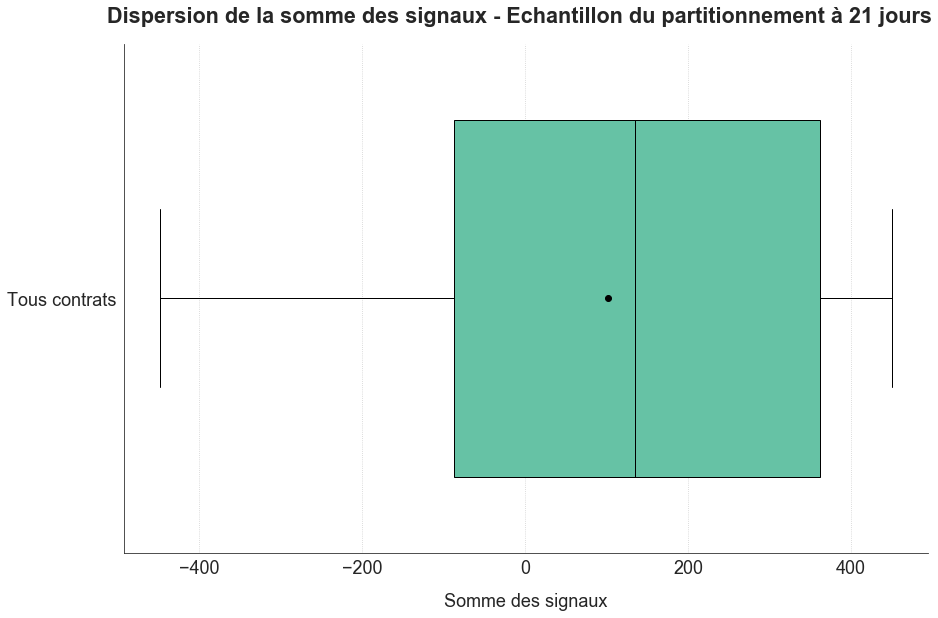

In [22]:
graph32 = sfg.MyGraph(title="Dispersion de la somme des signaux - Echantillon du partitionnement à 21 jours")
graph32.add_boxplot(echant1_data21.somme_signaux, means=True, vertical=False)
graph32.set_axe('x', label="Somme des signaux")
graph32.set_axe('y', tick_labels=["Tous contrats"])
fig, ax = graph32.fig, graph32.ax
#plt.savefig("M2_dispersion_somme_signaux_21jours.png")
plt.show()

In [23]:
interdata = echant1_data21.reset_index().groupby(["category_name","contract_id","somme_signaux"]).dateref.count().reset_index()
interdata.columns = ["category_name","contract_id","somme_signaux","nombre"]
interdata["bins"] = pd.cut(interdata.somme_signaux, [-450,-300,-150,0,150,300,450], include_lowest=True)
interdata.head()

,category_name,contract_id,somme_signaux,nombre,bins
0,Currencies,1,-402,1,"(-450.001, -300.0]"
1,Currencies,1,-401,4,"(-450.001, -300.0]"
2,Currencies,1,-400,3,"(-450.001, -300.0]"
3,Currencies,1,-399,2,"(-450.001, -300.0]"
4,Currencies,1,-398,1,"(-450.001, -300.0]"


In [24]:
graph_data = interdata.groupby(["category_name","contract_id","bins"]).nombre.sum().reset_index().sort_values(by=["category_name","contract_id","bins"])
graph_data["total"] = graph_data.groupby("contract_id").nombre.transform(pd.Series.sum)
graph_data["pourcentage_signaux"] = graph_data.nombre / graph_data.total
graph_data["pourcentage_cumule"] = graph_data.groupby("contract_id").pourcentage_signaux.cumsum()
graph_data = graph_data.merge(contracts[["name"]], how='left', left_on="contract_id", right_index=True)
graph_data.sort_values(by=["category_name","contract_id","bins"], inplace=True)
graph_data.head()

,category_name,contract_id,bins,nombre,total,pourcentage_signaux,pourcentage_cumule,name
0,Currencies,1,"(-450.001, -300.0]",190,1533,0.123940,0.123940,AUD
1,Currencies,1,"(-300.0, -150.0]",172,1533,0.112198,0.236138,AUD
2,Currencies,1,"(-150.0, 0.0]",293,1533,0.191129,0.427267,AUD
3,Currencies,1,"(0.0, 150.0]",202,1533,0.131768,0.559035,AUD
4,Currencies,1,"(150.0, 300.0]",231,1533,0.150685,0.709720,AUD


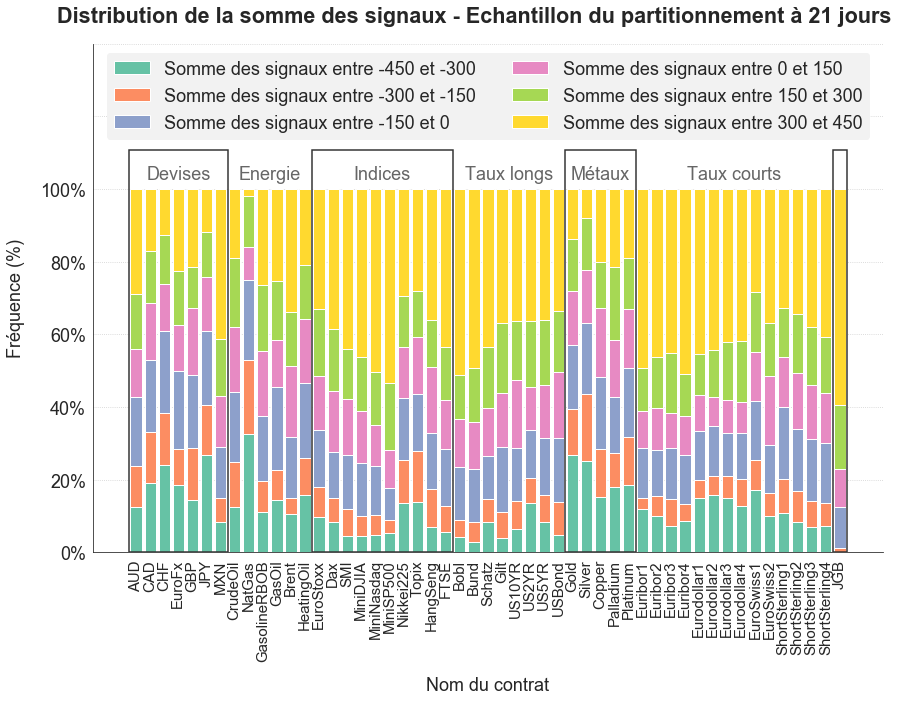

In [25]:
graph33 = sfg.MyGraph(title="Distribution de la somme des signaux - Echantillon du partitionnement à 21 jours")
for mybin in graph_data.bins.unique():
    graph33.add_barv(x_values=graph_data[graph_data.bins==mybin].name, 
                     y_height=graph_data[graph_data.bins==mybin].pourcentage_signaux,
                     y_bottom=graph_data[graph_data.bins==mybin].pourcentage_cumule - graph_data[graph_data.bins==mybin].pourcentage_signaux,
                     label="Somme des signaux entre {:.0f} et {:.0f}".format(mybin.left, mybin.right))
graph33.add_rectangle(coord_min=-0.5, coord_max=6.5, rect_max=0.79, color=(0.2,0.2,0.2))
graph33.add_rectangle(coord_min=12.5, coord_max=22.5, rect_max=0.79, color=(0.2,0.2,0.2))
graph33.add_rectangle(coord_min=30.5, coord_max=35.5, rect_max=0.79, color=(0.2,0.2,0.2))
graph33.add_rectangle(coord_min=49.5, coord_max=50.5, rect_max=0.79, color=(0.2,0.2,0.2))
graph33.add_text(x_coord=3, y_coord=1.065, text="Devises", color=(0.4,0.4,0.4), backgroundcolor=(1,1,1))
graph33.add_text(x_coord=9.5, y_coord=1.065, text="Energie", color=(0.4,0.4,0.4), backgroundcolor=(1,1,1))
graph33.add_text(x_coord=17.5, y_coord=1.065, text="Indices", color=(0.4,0.4,0.4), backgroundcolor=(1,1,1))
graph33.add_text(x_coord=26.5, y_coord=1.065, text="Taux longs", color=(0.4,0.4,0.4), backgroundcolor=(1,1,1))
graph33.add_text(x_coord=33, y_coord=1.065, text="Métaux", color=(0.4,0.4,0.4), backgroundcolor=(1,1,1))
graph33.add_text(x_coord=42.5, y_coord=1.065, text="Taux courts", color=(0.4,0.4,0.4), backgroundcolor=(1,1,1))
graph33.set_axe('x', label="Nom du contrat", rotation=90)
graph33.set_axe('y', label="Fréquence (%)", tick_min=0, tick_max=1.4, tick_labels=["0%","20%","40%","60%","80%","100%"," "," "])
graph33.set_legend(loc="upper center", ncol=2)
fig, ax = graph33.fig, graph33.ax
ax[0].tick_params(axis='x', labelsize=15)
plt.savefig("M2_distrib_somme_contrat_21jours.png")
plt.show()

In [26]:
intercat = echant1_data21.reset_index().groupby(["category_name","dateref"]).somme_signaux.mean().reset_index()
intercat.columns = ["category_name","dateref","moyenne_somme_signaux"]

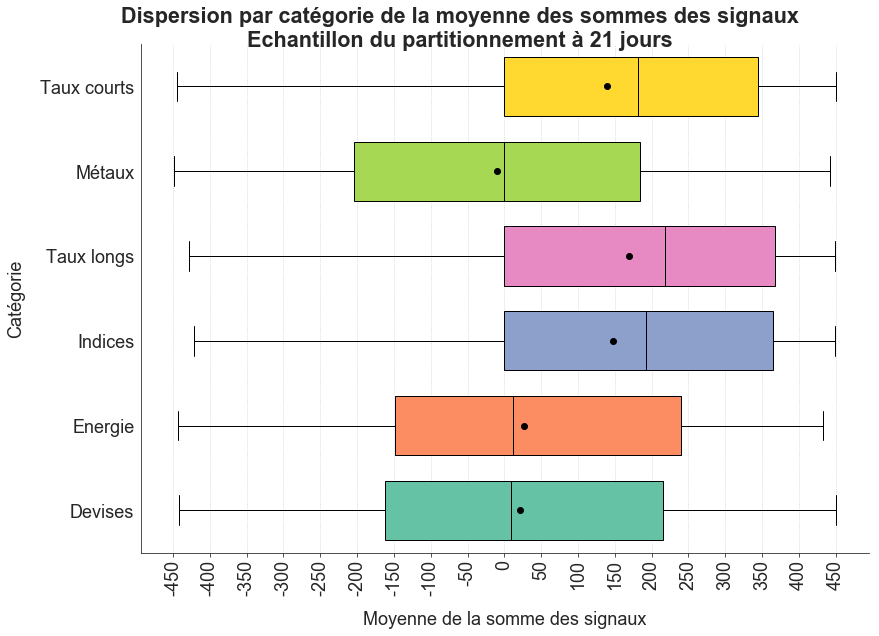

In [27]:
valeurs = [intercat[intercat.category_name==cat].moyenne_somme_signaux for cat in intercat.category_name.unique()]
graph34 = sfg.MyGraph(title="Dispersion par catégorie de la moyenne des sommes des signaux\nEchantillon du partitionnement à 21 jours")
graph34.add_boxplot(values=valeurs, cat_labels=intercat.category_name.unique(), means=True, vertical=False)
graph34.set_axe('x', label="Moyenne de la somme des signaux", tick_min=-450, tick_max=450, tick_step=50, tick_labels_format=':.0f', tick_dash=True, rotation=90)
graph34.set_axe('y', label="Catégorie", tick_labels=["Devises","Energie","Indices","Taux longs","Métaux","Taux courts"])
fig, ax = graph34.fig, graph34.ax
plt.savefig("M2_dispersion_moyenne_categorie_21jours.png")
plt.show()

In [28]:
interdata = intercat.groupby(["category_name","moyenne_somme_signaux"]).dateref.count().reset_index()
interdata.columns = ["category_name","moyenne_somme_signaux","nombre"]
interdata["bins"] = pd.cut(interdata.moyenne_somme_signaux, [-450,-300,-150,0,150,300,450], include_lowest=True)
interdata.head()

,category_name,moyenne_somme_signaux,nombre,bins
0,Currencies,-442.0,5,"(-450.001, -300.0]"
1,Currencies,-441.0,12,"(-450.001, -300.0]"
2,Currencies,-440.0,3,"(-450.001, -300.0]"
3,Currencies,-438.0,4,"(-450.001, -300.0]"
4,Currencies,-437.0,7,"(-450.001, -300.0]"


In [29]:
graph_data = interdata.groupby(["category_name","bins"]).nombre.sum().reset_index()
graph_data["total"] = graph_data.groupby("category_name").nombre.transform(pd.Series.sum)
graph_data["pourcentage_signaux"] = graph_data.nombre / graph_data.total
graph_data["pourcentage_cumule"] = graph_data.groupby("category_name").pourcentage_signaux.cumsum()
graph_data.head()

,category_name,bins,nombre,total,pourcentage_signaux,pourcentage_cumule
0,Currencies,"(-450.001, -300.0]",786,5909,0.133017,0.133017
1,Currencies,"(-300.0, -150.0]",759,5909,0.128448,0.261466
2,Currencies,"(-150.0, 0.0]",1332,5909,0.225419,0.486884
3,Currencies,"(0.0, 150.0]",1109,5909,0.187680,0.674564
4,Currencies,"(150.0, 300.0]",951,5909,0.160941,0.835505


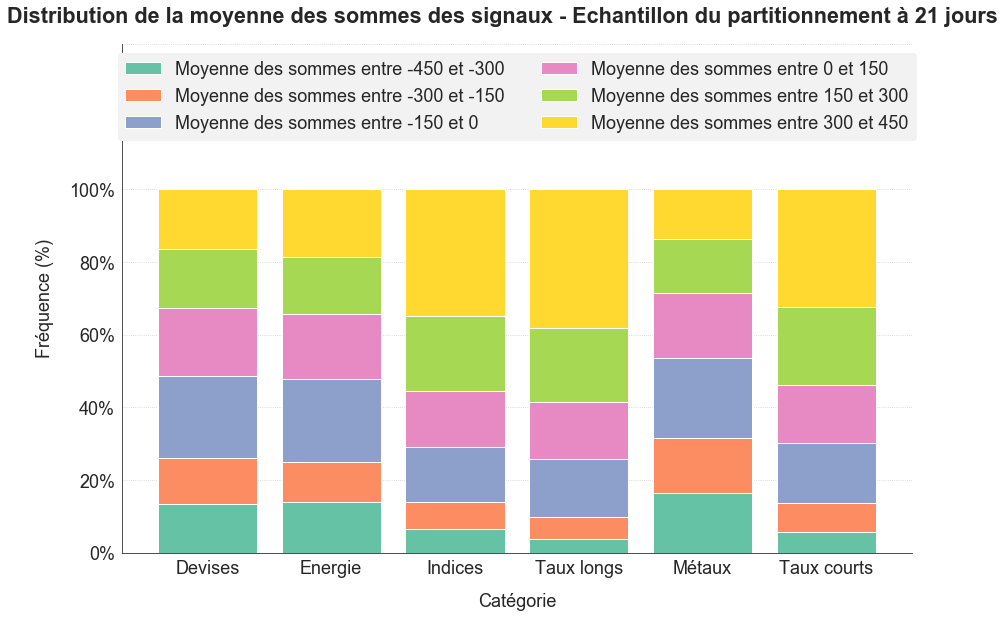

In [30]:
graph35 = sfg.MyGraph(title="Distribution de la moyenne des sommes des signaux - Echantillon du partitionnement à 21 jours")
for mybin in graph_data.bins.unique():
    graph35.add_barv(x_values=graph_data[graph_data.bins==mybin].category_name, 
                     y_height=graph_data[graph_data.bins==mybin].pourcentage_signaux,
                     y_bottom=graph_data[graph_data.bins==mybin].pourcentage_cumule - graph_data[graph_data.bins==mybin].pourcentage_signaux,
                     label="Moyenne des sommes entre {:.0f} et {:.0f}".format(mybin.left, mybin.right))
graph35.set_axe('x', label="Catégorie", tick_labels=["Devises","Energie","Indices","Taux longs","Métaux","Taux courts"])
graph35.set_axe('y', label="Fréquence (%)", tick_min=0, tick_max=1.4, tick_labels=["0%","20%","40%","60%","80%","100%"," "," "])
graph35.set_legend(loc="upper center", ncol=2)
fig, ax = graph35.fig, graph35.ax
#plt.savefig("M2_distrib_moyenne_categorie_21jours.png")
plt.show()

Les graphes d'analyse montrent que la distribution originale des sommes de signaux par contrat et par jour est bien respectée dans notre échantillon de 20% des données pour la classification à 21 jours.  
On note que la distribution des moyennes des sommes des signaux par catégorie est assez fidèle, à l'exception des valeurs extêmes (moyennes supérieures à 300 ou inférieures à -300) qui sont sur-représentées dans l'échantillon.

In [31]:
data_classif = echant1_data21[["somme_signaux","variation_21_standard"]].dropna()
kmeans21 = sfca.ClassificationKmeans(data_classif)
kmeans21.calculate_kmeans(n_clust_min=9, n_clust_max=11)
kmeans21.define_n_clusters(10)
kmeans21.calculate_clusters_centroids()
resultats_kmeans21 = kmeans21.df_data_clusters.copy()

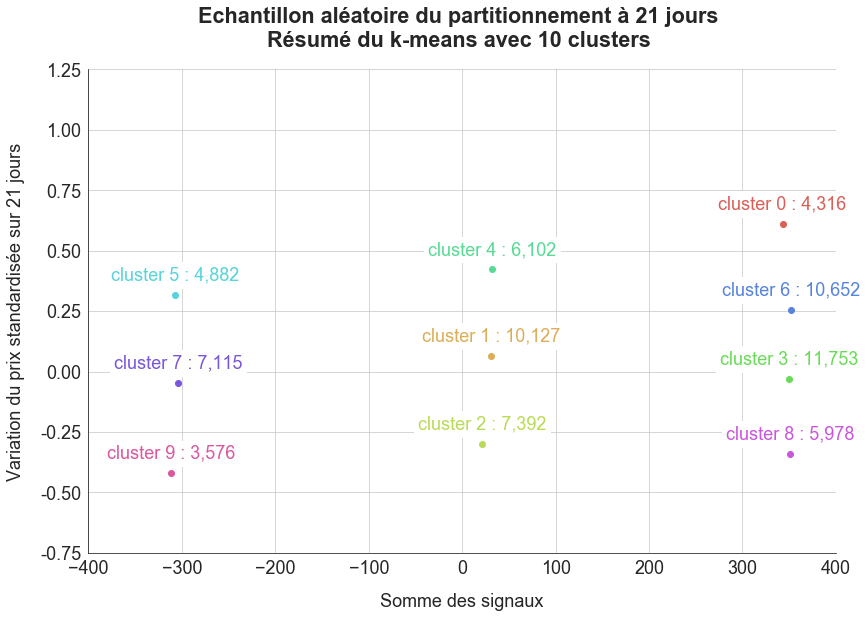

In [32]:
sns.set_palette(sns.color_palette("hls", 10))
liste_10couleurs = sns.color_palette()
graph36 = sfg.MyGraph(title="Echantillon aléatoire du partitionnement à 21 jours\nRésumé du k-means avec 10 clusters")
for i in np.arange(len(kmeans21.df_centroids)):
    graph36.add_plot(x_values=kmeans21.df_centroids.iloc[i].somme_signaux, \
                     y_values=kmeans21.df_centroids.iloc[i].variation_21_standard, \
                     label=kmeans21.df_centroids.index[i], color=liste_10couleurs[i], \
                      marker='o', linestyle='', with_grid='both')
    graph36.add_text(x_coord=kmeans21.df_centroids.iloc[i].somme_signaux, \
                     y_coord=kmeans21.df_centroids.iloc[i].variation_21_standard+0.12, \
                     text="{} : {:,.0f}".format(kmeans21.df_centroids.index[i],kmeans21.df_centroids.iloc[i].nombre_individus), \
                      color=liste_10couleurs[i], backgroundcolor=(1,1,1))
graph36.set_axe('x', label="Somme des signaux", tick_min=-400, tick_max=400)
graph36.set_axe('y', label="Variation du prix standardisée sur 21 jours", tick_min=-0.75, tick_max=1.25, tick_step=0.25, tick_labels_format=':.2f')
fig, ax = graph36.fig, graph36.ax
plt.savefig("M2_echantillon_aleatoire_kmeans21_10centroids.png")
plt.show()

In [33]:
temp = kmeans21.df_data_clusters.copy()
temp = temp.merge(echant1_data21[["top_cluster"]], how='left', left_index=True, right_index=True)
temp.head()

,,somme_signaux,variation_21_standard,cluster,top_cluster
contract_id,dateref,,,,
38,2009-08-11,430,0.610184,0,True
35,2000-08-14,22,0.181237,1,False
32,1993-04-21,449,-0.174723,3,False
40,2002-12-13,317,0.347539,6,False
5,1991-05-29,-105,-0.476905,2,False


In [34]:
temp[temp.top_cluster==True].cluster.unique()

array([0, 4], dtype=int64)

In [35]:
print("Nombre de données du top_cluster dans le cluster 1 : {}".format(\
        len(temp[(temp.cluster==1) & (temp.top_cluster==True)])))
print("Nombre d'autres données dans le cluster 1 : {}".format(\
        len(temp[(temp.cluster==1) & (temp.top_cluster==False)])))
print("Nombre de données du top_cluster dans d'autres clusters : {}".format(\
        len(temp[(temp.cluster!=1) & (temp.top_cluster==True)])))

Nombre de données du top_cluster dans le cluster 1 : 0
Nombre d'autres données dans le cluster 1 : 10127
Nombre de données du top_cluster dans d'autres clusters : 4261


Le cluster 1 de ce k-means représente très bien le top_cluster de notre k-means initial. Il ne comporte que des données du top_cluster. Seules 267 données du top_cluster lui échappent.

**Clusters basés sur l'évolution des prix à 2 mois**

In [36]:
print("Somme min = {}".format(echant1_data42.somme_signaux.min()))
print("Somme max = {}".format(echant1_data42.somme_signaux.max()))
print("Somme moyenne = {}".format(echant1_data42.somme_signaux.mean()))
print("Somme mediane = {}".format(echant1_data42.somme_signaux.median()))

Somme min = -448
Somme max = 450
Somme moyenne = 102.01132828303966
Somme mediane = 134.0


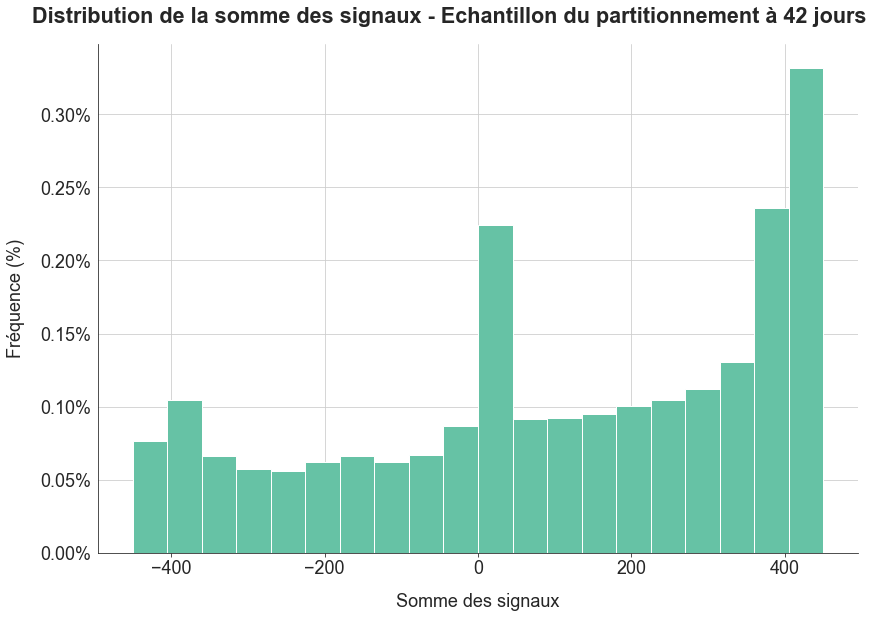

In [37]:
graph41 = sfg.MyGraph(title="Distribution de la somme des signaux - Echantillon du partitionnement à 42 jours")
graph41.add_histogramme(echant1_data42.somme_signaux, range=(-450,450))
graph41.set_axe('x', label="Somme des signaux", tick_dash=True)
graph41.set_axe('y', label="Fréquence (%)", tick_labels_format=':.2%')
fig, ax = graph41.fig, graph41.ax
plt.savefig("M2_distribution_somme_signaux_42jours.png")
plt.show()

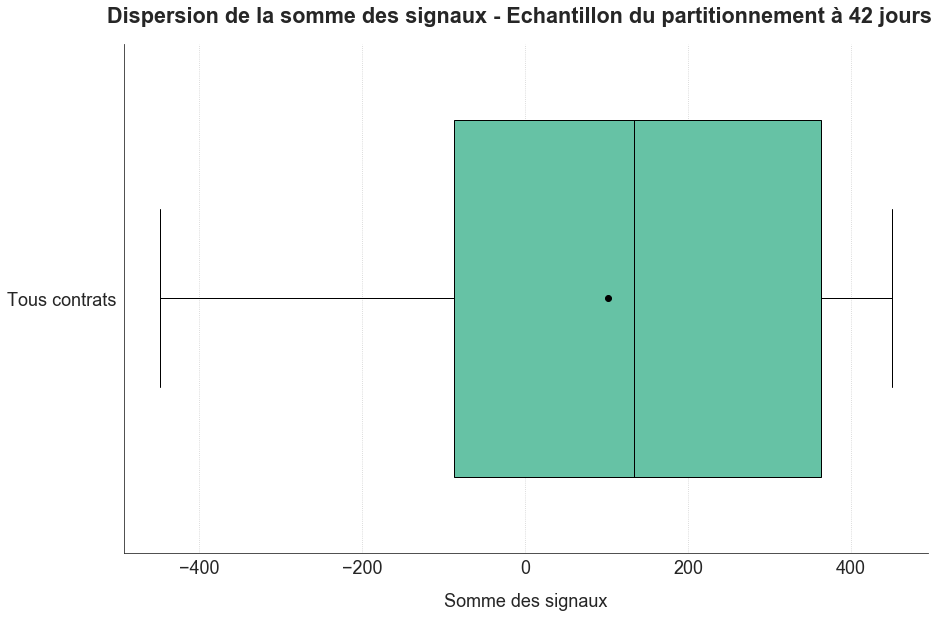

In [38]:
graph42 = sfg.MyGraph(title="Dispersion de la somme des signaux - Echantillon du partitionnement à 42 jours")
graph42.add_boxplot(echant1_data42.somme_signaux, means=True, vertical=False)
graph42.set_axe('x', label="Somme des signaux")
graph42.set_axe('y', tick_labels=["Tous contrats"])
fig, ax = graph42.fig, graph42.ax
#plt.savefig("M2_dispersion_somme_signaux_42jours.png")
plt.show()

In [39]:
interdata = echant1_data42.reset_index().groupby(["category_name","contract_id","somme_signaux"]).dateref.count().reset_index()
interdata.columns = ["category_name","contract_id","somme_signaux","nombre"]
interdata["bins"] = pd.cut(interdata.somme_signaux, [-450,-300,-150,0,150,300,450], include_lowest=True)
interdata.head()

,category_name,contract_id,somme_signaux,nombre,bins
0,Currencies,1,-402,2,"(-450.001, -300.0]"
1,Currencies,1,-401,2,"(-450.001, -300.0]"
2,Currencies,1,-400,1,"(-450.001, -300.0]"
3,Currencies,1,-399,5,"(-450.001, -300.0]"
4,Currencies,1,-398,2,"(-450.001, -300.0]"


In [40]:
graph_data = interdata.groupby(["category_name","contract_id","bins"]).nombre.sum().reset_index().sort_values(by=["category_name","contract_id","bins"])
graph_data["total"] = graph_data.groupby("contract_id").nombre.transform(pd.Series.sum)
graph_data["pourcentage_signaux"] = graph_data.nombre / graph_data.total
graph_data["pourcentage_cumule"] = graph_data.groupby("contract_id").pourcentage_signaux.cumsum()
graph_data = graph_data.merge(contracts[["name"]], how='left', left_on="contract_id", right_index=True)
graph_data.sort_values(by=["category_name","contract_id","bins"], inplace=True)
graph_data.head()

,category_name,contract_id,bins,nombre,total,pourcentage_signaux,pourcentage_cumule,name
0,Currencies,1,"(-450.001, -300.0]",192,1531,0.125408,0.125408,AUD
1,Currencies,1,"(-300.0, -150.0]",157,1531,0.102547,0.227956,AUD
2,Currencies,1,"(-150.0, 0.0]",299,1531,0.195297,0.423253,AUD
3,Currencies,1,"(0.0, 150.0]",210,1531,0.137165,0.560418,AUD
4,Currencies,1,"(150.0, 300.0]",235,1531,0.153494,0.713912,AUD


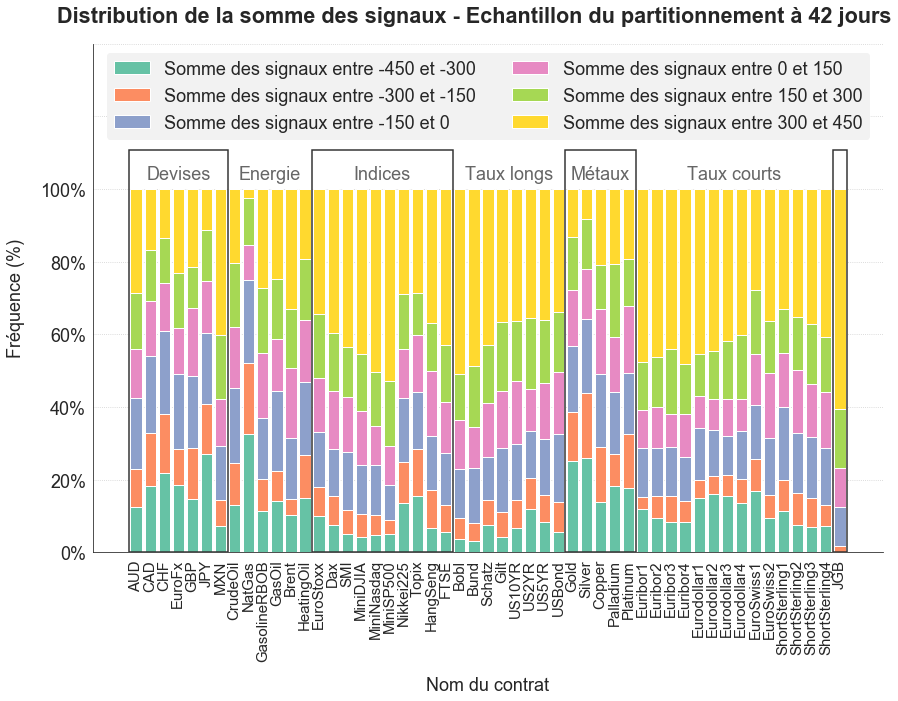

In [41]:
graph43 = sfg.MyGraph(title="Distribution de la somme des signaux - Echantillon du partitionnement à 42 jours")
for mybin in graph_data.bins.unique():
    graph43.add_barv(x_values=graph_data[graph_data.bins==mybin].name, 
                     y_height=graph_data[graph_data.bins==mybin].pourcentage_signaux,
                     y_bottom=graph_data[graph_data.bins==mybin].pourcentage_cumule - graph_data[graph_data.bins==mybin].pourcentage_signaux,
                     label="Somme des signaux entre {:.0f} et {:.0f}".format(mybin.left, mybin.right))
graph43.add_rectangle(coord_min=-0.5, coord_max=6.5, rect_max=0.79, color=(0.2,0.2,0.2))
graph43.add_rectangle(coord_min=12.5, coord_max=22.5, rect_max=0.79, color=(0.2,0.2,0.2))
graph43.add_rectangle(coord_min=30.5, coord_max=35.5, rect_max=0.79, color=(0.2,0.2,0.2))
graph43.add_rectangle(coord_min=49.5, coord_max=50.5, rect_max=0.79, color=(0.2,0.2,0.2))
graph43.add_text(x_coord=3, y_coord=1.065, text="Devises", color=(0.4,0.4,0.4), backgroundcolor=(1,1,1))
graph43.add_text(x_coord=9.5, y_coord=1.065, text="Energie", color=(0.4,0.4,0.4), backgroundcolor=(1,1,1))
graph43.add_text(x_coord=17.5, y_coord=1.065, text="Indices", color=(0.4,0.4,0.4), backgroundcolor=(1,1,1))
graph43.add_text(x_coord=26.5, y_coord=1.065, text="Taux longs", color=(0.4,0.4,0.4), backgroundcolor=(1,1,1))
graph43.add_text(x_coord=33, y_coord=1.065, text="Métaux", color=(0.4,0.4,0.4), backgroundcolor=(1,1,1))
graph43.add_text(x_coord=42.5, y_coord=1.065, text="Taux courts", color=(0.4,0.4,0.4), backgroundcolor=(1,1,1))
graph43.set_axe('x', label="Nom du contrat", rotation=90)
graph43.set_axe('y', label="Fréquence (%)", tick_min=0, tick_max=1.4, tick_labels=["0%","20%","40%","60%","80%","100%"," "," "])
graph43.set_legend(loc="upper center", ncol=2)
fig, ax = graph43.fig, graph43.ax
ax[0].tick_params(axis='x', labelsize=15)
plt.savefig("M2_distrib_somme_contrat_42jours.png")
plt.show()

In [42]:
intercat = echant1_data42.reset_index().groupby(["category_name","dateref"]).somme_signaux.mean().reset_index()
intercat.columns = ["category_name","dateref","moyenne_somme_signaux"]

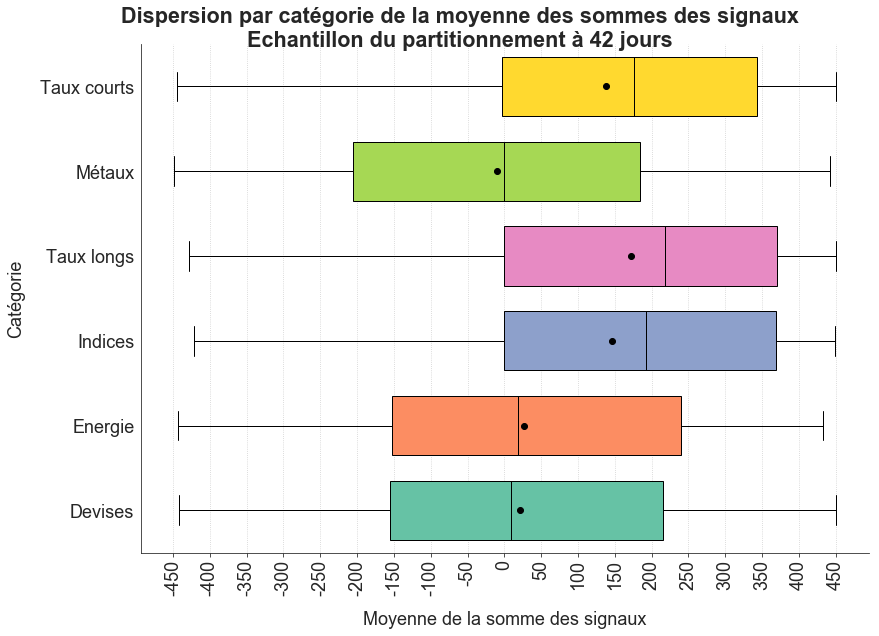

In [43]:
valeurs = [intercat[intercat.category_name==cat].moyenne_somme_signaux for cat in intercat.category_name.unique()]
graph44 = sfg.MyGraph(title="Dispersion par catégorie de la moyenne des sommes des signaux\nEchantillon du partitionnement à 42 jours")
graph44.add_boxplot(values=valeurs, cat_labels=intercat.category_name.unique(), means=True, vertical=False)
graph44.set_axe('x', label="Moyenne de la somme des signaux", tick_min=-450, tick_max=450, tick_step=50, tick_labels_format=':.0f', tick_dash=True, rotation=90)
graph44.set_axe('y', label="Catégorie", tick_labels=["Devises","Energie","Indices","Taux longs","Métaux","Taux courts"])
fig, ax = graph44.fig, graph44.ax
plt.savefig("M2_dispersion_moyenne_categorie_42jours.png")
plt.show()

In [44]:
interdata = intercat.groupby(["category_name","moyenne_somme_signaux"]).dateref.count().reset_index()
interdata.columns = ["category_name","moyenne_somme_signaux","nombre"]
interdata["bins"] = pd.cut(interdata.moyenne_somme_signaux, [-450,-300,-150,0,150,300,450], include_lowest=True)
interdata.head()

,category_name,moyenne_somme_signaux,nombre,bins
0,Currencies,-442.0,2,"(-450.001, -300.0]"
1,Currencies,-441.0,19,"(-450.001, -300.0]"
2,Currencies,-440.0,4,"(-450.001, -300.0]"
3,Currencies,-439.5,1,"(-450.001, -300.0]"
4,Currencies,-439.0,1,"(-450.001, -300.0]"


In [45]:
graph_data = interdata.groupby(["category_name","bins"]).nombre.sum().reset_index()
graph_data["total"] = graph_data.groupby("category_name").nombre.transform(pd.Series.sum)
graph_data["pourcentage_signaux"] = graph_data.nombre / graph_data.total
graph_data["pourcentage_cumule"] = graph_data.groupby("category_name").pourcentage_signaux.cumsum()
graph_data.head()

,category_name,bins,nombre,total,pourcentage_signaux,pourcentage_cumule
0,Currencies,"(-450.001, -300.0]",765,5890,0.129881,0.129881
1,Currencies,"(-300.0, -150.0]",745,5890,0.126486,0.256367
2,Currencies,"(-150.0, 0.0]",1380,5890,0.234295,0.490662
3,Currencies,"(0.0, 150.0]",1112,5890,0.188795,0.679457
4,Currencies,"(150.0, 300.0]",952,5890,0.161630,0.841087


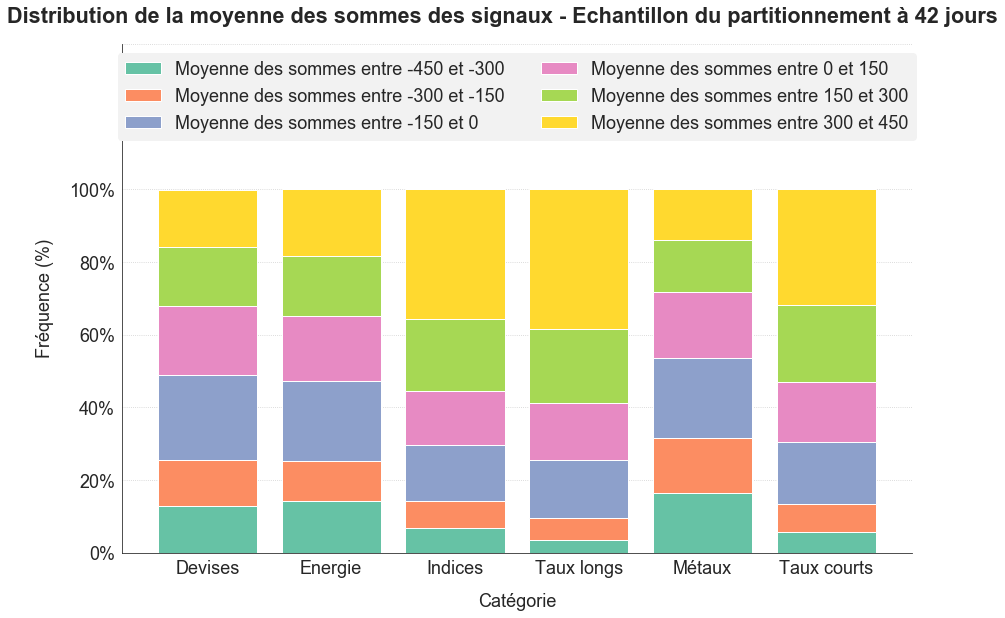

In [46]:
graph45 = sfg.MyGraph(title="Distribution de la moyenne des sommes des signaux - Echantillon du partitionnement à 42 jours")
for mybin in graph_data.bins.unique():
    graph45.add_barv(x_values=graph_data[graph_data.bins==mybin].category_name, 
                     y_height=graph_data[graph_data.bins==mybin].pourcentage_signaux,
                     y_bottom=graph_data[graph_data.bins==mybin].pourcentage_cumule - graph_data[graph_data.bins==mybin].pourcentage_signaux,
                     label="Moyenne des sommes entre {:.0f} et {:.0f}".format(mybin.left, mybin.right))
graph45.set_axe('x', label="Catégorie", tick_labels=["Devises","Energie","Indices","Taux longs","Métaux","Taux courts"])
graph45.set_axe('y', label="Fréquence (%)", tick_min=0, tick_max=1.4, tick_labels=["0%","20%","40%","60%","80%","100%"," "," "])
graph45.set_legend(loc="upper center", ncol=2)
fig, ax = graph45.fig, graph45.ax
#plt.savefig("M2_distrib_moyenne_categorie_42jours.png")
plt.show()

Les graphes d'analyse montrent que la distribution originale des sommes de signaux par contrat et par jour est bien respectée dans notre échantillon de 20% des données pour la classification à 42 jours.  
On note que la distribution des moyennes des sommes des signaux par catégorie est assez fidèle, à l'exception des valeurs extêmes (moyennes supérieures à 300 ou inférieures à -300) qui sont sur-représentées dans l'échantillon.

In [47]:
data_classif = echant1_data42[["somme_signaux","variation_42_standard"]].dropna()
kmeans42 = sfca.ClassificationKmeans(data_classif)
kmeans42.calculate_kmeans(n_clust_min=9, n_clust_max=11)
kmeans42.define_n_clusters(10)
kmeans42.calculate_clusters_centroids()
resultats_kmeans42 = kmeans42.df_data_clusters.copy()

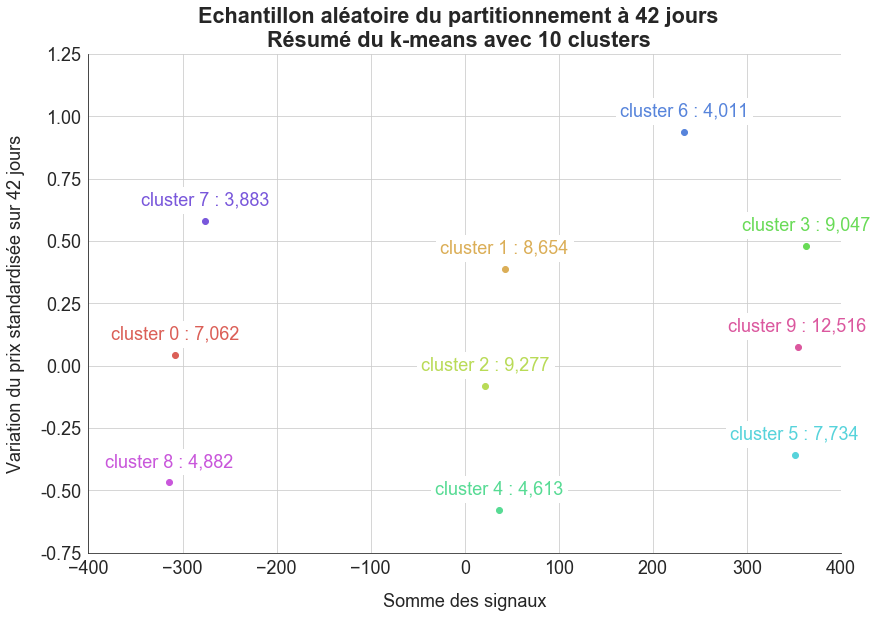

In [48]:
graph46 = sfg.MyGraph(title="Echantillon aléatoire du partitionnement à 42 jours\nRésumé du k-means avec 10 clusters")
for i in np.arange(len(kmeans42.df_centroids)):
    graph46.add_plot(x_values=kmeans42.df_centroids.iloc[i].somme_signaux, \
                     y_values=kmeans42.df_centroids.iloc[i].variation_42_standard, \
                     label=kmeans42.df_centroids.index[i], color=liste_10couleurs[i], \
                      marker='o', linestyle='', with_grid='both')
    graph46.add_text(x_coord=kmeans42.df_centroids.iloc[i].somme_signaux, \
                     y_coord=kmeans42.df_centroids.iloc[i].variation_42_standard+0.12, \
                     text="{} : {:,.0f}".format(kmeans42.df_centroids.index[i],kmeans42.df_centroids.iloc[i].nombre_individus), \
                      color=liste_10couleurs[i], backgroundcolor=(1,1,1))
graph46.set_axe('x', label="Somme des signaux", tick_min=-400, tick_max=400)
graph46.set_axe('y', label="Variation du prix standardisée sur 42 jours", tick_min=-0.75, tick_max=1.25, tick_labels_format=':.2f')
fig, ax = graph46.fig, graph46.ax
plt.savefig("M2_echantillon_aleatoire_kmeans42_10centroids.png")
plt.show()

In [49]:
temp = kmeans42.df_data_clusters.copy()
temp = temp.merge(echant1_data42[["top_cluster"]], how='left', left_index=True, right_index=True)
temp.head()

,,somme_signaux,variation_42_standard,cluster,top_cluster
contract_id,dateref,,,,
14,2003-02-19,427,0.033813,9,False
29,2019-03-12,368,0.546634,3,False
2,2004-01-12,361,-0.340060,5,False
10,1991-10-14,0,-0.085845,2,False
21,1989-08-22,0,0.150839,2,False


In [50]:
temp[temp.top_cluster==True].cluster.unique()

array([6, 3, 7], dtype=int64)

In [51]:
print("Nombre de données du top_cluster dans le cluster 8 : {}".format(\
        len(temp[(temp.cluster==8) & (temp.top_cluster==True)])))
print("Nombre d'autres données dans le cluster 8 : {}".format(\
        len(temp[(temp.cluster==8) & (temp.top_cluster==False)])))
print("Nombre de données du top_cluster dans d'autres clusters : {}".format(\
        len(temp[(temp.cluster!=8) & (temp.top_cluster==True)])))

Nombre de données du top_cluster dans le cluster 8 : 0
Nombre d'autres données dans le cluster 8 : 4882
Nombre de données du top_cluster dans d'autres clusters : 4005


Le cluster 8 de ce k-means représente très bien le top_cluster de notre k-means initial.

**Clusters basés sur l'évolution des prix à 3 mois**

In [52]:
print("Somme min = {}".format(echant1_data64.somme_signaux.min()))
print("Somme max = {}".format(echant1_data64.somme_signaux.max()))
print("Somme moyenne = {}".format(echant1_data64.somme_signaux.mean()))
print("Somme mediane = {}".format(echant1_data64.somme_signaux.median()))

Somme min = -448
Somme max = 450
Somme moyenne = 101.11295220768315
Somme mediane = 131.0


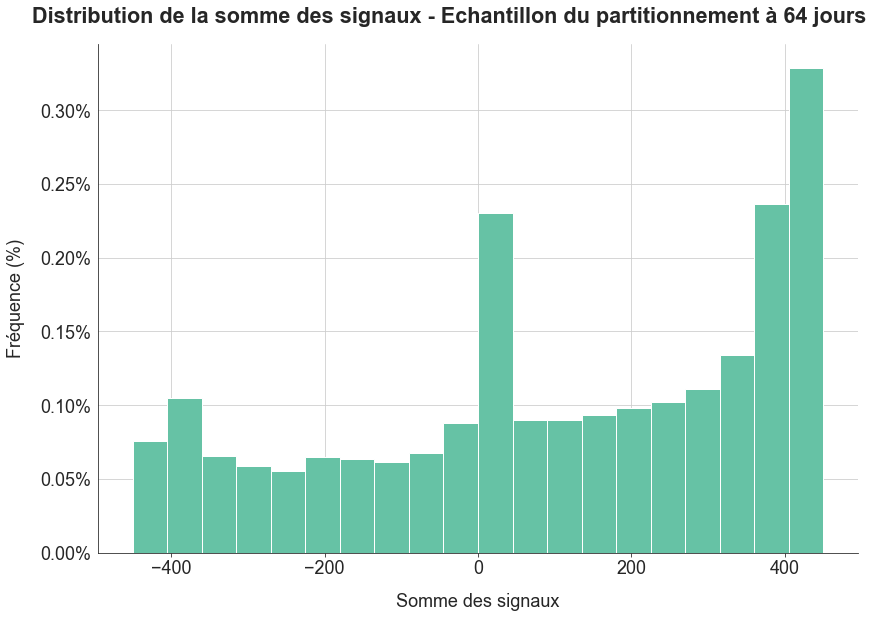

In [53]:
graph51 = sfg.MyGraph(title="Distribution de la somme des signaux - Echantillon du partitionnement à 64 jours")
graph51.add_histogramme(echant1_data64.somme_signaux, range=(-450,450))
graph51.set_axe('x', label="Somme des signaux", tick_dash=True)
graph51.set_axe('y', label="Fréquence (%)", tick_labels_format=':.2%')
fig, ax = graph51.fig, graph51.ax
plt.savefig("M2_distribution_somme_signaux_64jours.png")
plt.show()

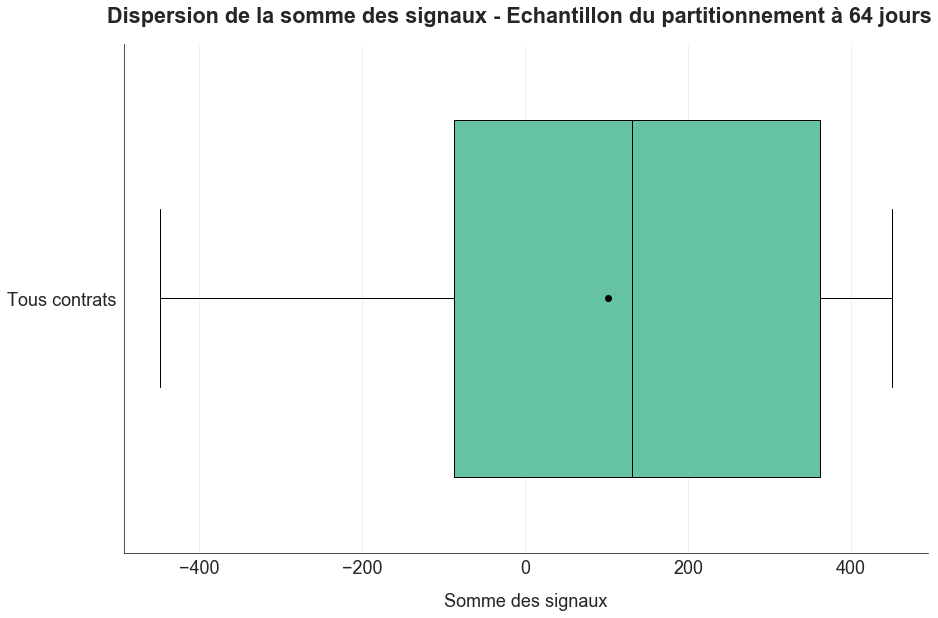

In [54]:
graph52 = sfg.MyGraph(title="Dispersion de la somme des signaux - Echantillon du partitionnement à 64 jours")
graph52.add_boxplot(echant1_data64.somme_signaux, means=True, vertical=False)
graph52.set_axe('x', label="Somme des signaux")
graph52.set_axe('y', tick_labels=["Tous contrats"])
fig, ax = graph52.fig, graph52.ax
#plt.savefig("M2_dispersion_somme_signaux_64jours.png")
plt.show()

In [55]:
interdata = echant1_data64.reset_index().groupby(["category_name","contract_id","somme_signaux"]).dateref.count().reset_index()
interdata.columns = ["category_name","contract_id","somme_signaux","nombre"]
interdata["bins"] = pd.cut(interdata.somme_signaux, [-450,-300,-150,0,150,300,450], include_lowest=True)
interdata.head()

,category_name,contract_id,somme_signaux,nombre,bins
0,Currencies,1,-402,1,"(-450.001, -300.0]"
1,Currencies,1,-401,2,"(-450.001, -300.0]"
2,Currencies,1,-400,2,"(-450.001, -300.0]"
3,Currencies,1,-399,4,"(-450.001, -300.0]"
4,Currencies,1,-398,1,"(-450.001, -300.0]"


In [56]:
graph_data = interdata.groupby(["category_name","contract_id","bins"]).nombre.sum().reset_index().sort_values(by=["category_name","contract_id","bins"])
graph_data["total"] = graph_data.groupby("contract_id").nombre.transform(pd.Series.sum)
graph_data["pourcentage_signaux"] = graph_data.nombre / graph_data.total
graph_data["pourcentage_cumule"] = graph_data.groupby("contract_id").pourcentage_signaux.cumsum()
graph_data = graph_data.merge(contracts[["name"]], how='left', left_on="contract_id", right_index=True)
graph_data.sort_values(by=["category_name","contract_id","bins"], inplace=True)
graph_data.head()

,category_name,contract_id,bins,nombre,total,pourcentage_signaux,pourcentage_cumule,name
0,Currencies,1,"(-450.001, -300.0]",196,1525,0.128525,0.128525,AUD
1,Currencies,1,"(-300.0, -150.0]",152,1525,0.099672,0.228197,AUD
2,Currencies,1,"(-150.0, 0.0]",314,1525,0.205902,0.434098,AUD
3,Currencies,1,"(0.0, 150.0]",203,1525,0.133115,0.567213,AUD
4,Currencies,1,"(150.0, 300.0]",235,1525,0.154098,0.721311,AUD


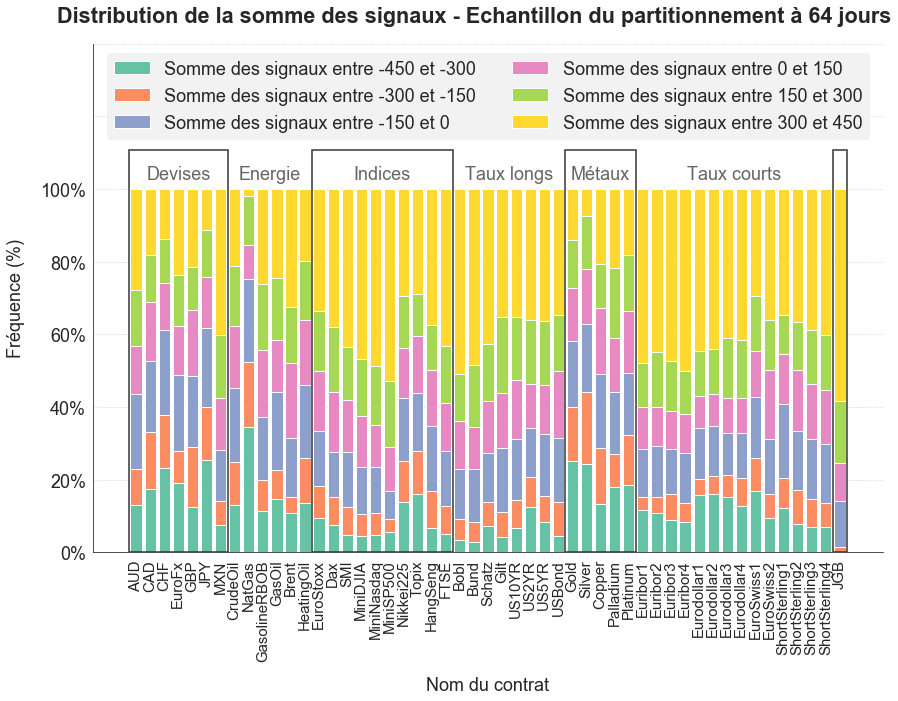

In [57]:
graph53 = sfg.MyGraph(title="Distribution de la somme des signaux - Echantillon du partitionnement à 64 jours")
for mybin in graph_data.bins.unique():
    graph53.add_barv(x_values=graph_data[graph_data.bins==mybin].name, 
                     y_height=graph_data[graph_data.bins==mybin].pourcentage_signaux,
                     y_bottom=graph_data[graph_data.bins==mybin].pourcentage_cumule - graph_data[graph_data.bins==mybin].pourcentage_signaux,
                     label="Somme des signaux entre {:.0f} et {:.0f}".format(mybin.left, mybin.right))
graph53.add_rectangle(coord_min=-0.5, coord_max=6.5, rect_max=0.79, color=(0.2,0.2,0.2))
graph53.add_rectangle(coord_min=12.5, coord_max=22.5, rect_max=0.79, color=(0.2,0.2,0.2))
graph53.add_rectangle(coord_min=30.5, coord_max=35.5, rect_max=0.79, color=(0.2,0.2,0.2))
graph53.add_rectangle(coord_min=49.5, coord_max=50.5, rect_max=0.79, color=(0.2,0.2,0.2))
graph53.add_text(x_coord=3, y_coord=1.065, text="Devises", color=(0.4,0.4,0.4), backgroundcolor=(1,1,1))
graph53.add_text(x_coord=9.5, y_coord=1.065, text="Energie", color=(0.4,0.4,0.4), backgroundcolor=(1,1,1))
graph53.add_text(x_coord=17.5, y_coord=1.065, text="Indices", color=(0.4,0.4,0.4), backgroundcolor=(1,1,1))
graph53.add_text(x_coord=26.5, y_coord=1.065, text="Taux longs", color=(0.4,0.4,0.4), backgroundcolor=(1,1,1))
graph53.add_text(x_coord=33, y_coord=1.065, text="Métaux", color=(0.4,0.4,0.4), backgroundcolor=(1,1,1))
graph53.add_text(x_coord=42.5, y_coord=1.065, text="Taux courts", color=(0.4,0.4,0.4), backgroundcolor=(1,1,1))
graph53.set_axe('x', label="Nom du contrat", rotation=90)
graph53.set_axe('y', label="Fréquence (%)", tick_min=0, tick_max=1.4, tick_labels=["0%","20%","40%","60%","80%","100%"," "," "])
graph53.set_legend(loc="upper center", ncol=2)
fig, ax = graph53.fig, graph53.ax
ax[0].tick_params(axis='x', labelsize=15)
plt.savefig("M2_distrib_somme_contrat_64jours.png")
plt.show()

In [58]:
intercat = echant1_data64.reset_index().groupby(["category_name","dateref"]).somme_signaux.mean().reset_index()
intercat.columns = ["category_name","dateref","moyenne_somme_signaux"]

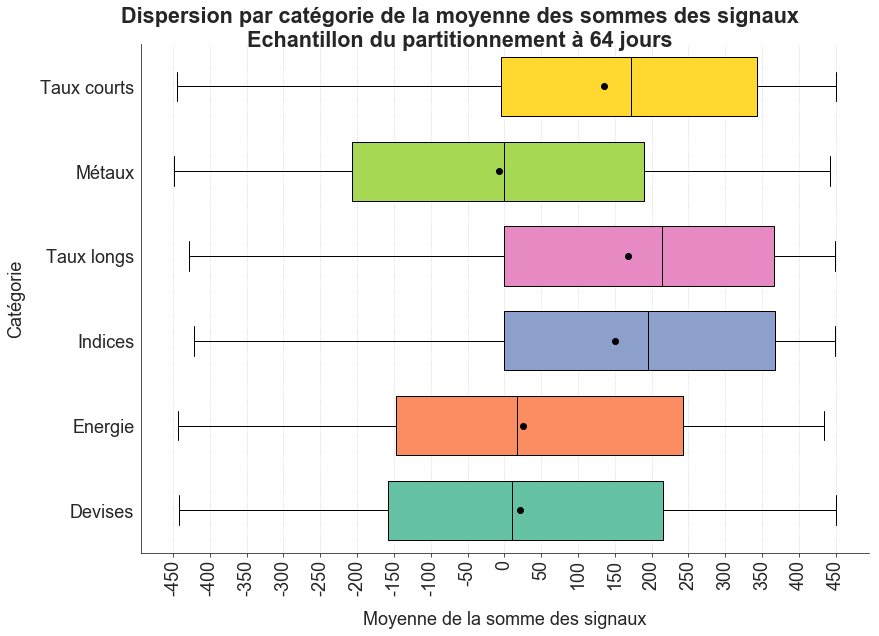

In [59]:
valeurs = [intercat[intercat.category_name==cat].moyenne_somme_signaux for cat in intercat.category_name.unique()]
graph54 = sfg.MyGraph(title="Dispersion par catégorie de la moyenne des sommes des signaux\nEchantillon du partitionnement à 64 jours")
graph54.add_boxplot(values=valeurs, cat_labels=intercat.category_name.unique(), means=True, vertical=False)
graph54.set_axe('x', label="Moyenne de la somme des signaux", tick_min=-450, tick_max=450, tick_step=50, tick_labels_format=':.0f', tick_dash=True, rotation=90)
graph54.set_axe('y', label="Catégorie", tick_labels=["Devises","Energie","Indices","Taux longs","Métaux","Taux courts"])
fig, ax = graph54.fig, graph54.ax
plt.savefig("M2_dispersion_moyenne_categorie_64jours.png")
plt.show()

In [60]:
interdata = intercat.groupby(["category_name","moyenne_somme_signaux"]).dateref.count().reset_index()
interdata.columns = ["category_name","moyenne_somme_signaux","nombre"]
interdata["bins"] = pd.cut(interdata.moyenne_somme_signaux, [-450,-300,-150,0,150,300,450], include_lowest=True)
interdata.head()

,category_name,moyenne_somme_signaux,nombre,bins
0,Currencies,-442.0,6,"(-450.001, -300.0]"
1,Currencies,-441.0,15,"(-450.001, -300.0]"
2,Currencies,-440.0,3,"(-450.001, -300.0]"
3,Currencies,-439.0,1,"(-450.001, -300.0]"
4,Currencies,-438.0,6,"(-450.001, -300.0]"


In [61]:
graph_data = interdata.groupby(["category_name","bins"]).nombre.sum().reset_index()
graph_data["total"] = graph_data.groupby("category_name").nombre.transform(pd.Series.sum)
graph_data["pourcentage_signaux"] = graph_data.nombre / graph_data.total
graph_data["pourcentage_cumule"] = graph_data.groupby("category_name").pourcentage_signaux.cumsum()
graph_data.head()

,category_name,bins,nombre,total,pourcentage_signaux,pourcentage_cumule
0,Currencies,"(-450.001, -300.0]",735,5832,0.126029,0.126029
1,Currencies,"(-300.0, -150.0]",770,5832,0.132030,0.258059
2,Currencies,"(-150.0, 0.0]",1330,5832,0.228052,0.486111
3,Currencies,"(0.0, 150.0]",1113,5832,0.190844,0.676955
4,Currencies,"(150.0, 300.0]",975,5832,0.167181,0.844136


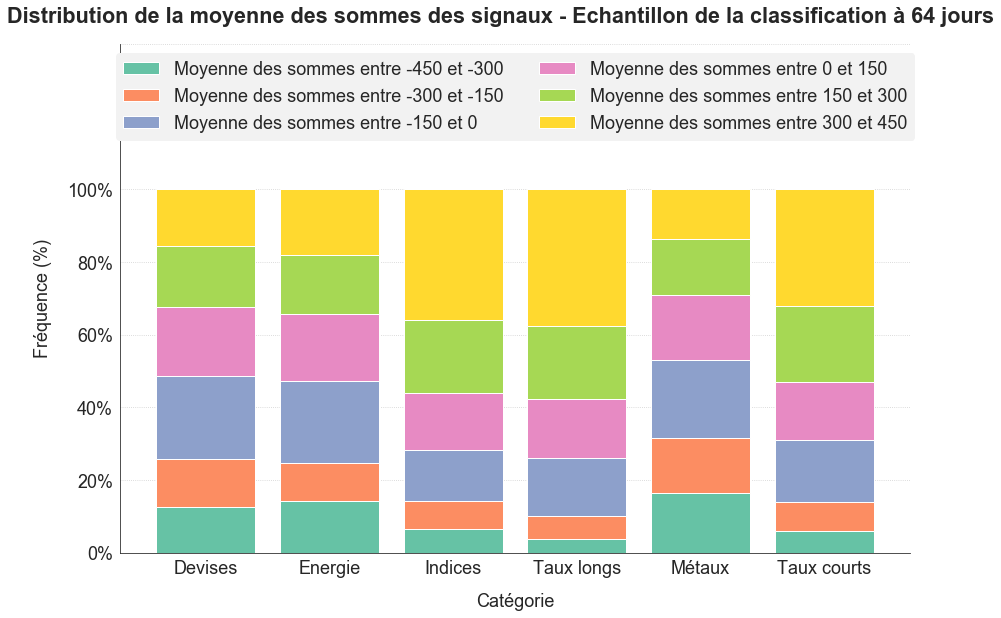

In [62]:
graph55 = sfg.MyGraph(title="Distribution de la moyenne des sommes des signaux - Echantillon de la classification à 64 jours")
for mybin in graph_data.bins.unique():
    graph55.add_barv(x_values=graph_data[graph_data.bins==mybin].category_name, 
                     y_height=graph_data[graph_data.bins==mybin].pourcentage_signaux,
                     y_bottom=graph_data[graph_data.bins==mybin].pourcentage_cumule - graph_data[graph_data.bins==mybin].pourcentage_signaux,
                     label="Moyenne des sommes entre {:.0f} et {:.0f}".format(mybin.left, mybin.right))
graph55.set_axe('x', label="Catégorie", tick_labels=["Devises","Energie","Indices","Taux longs","Métaux","Taux courts"])
graph55.set_axe('y', label="Fréquence (%)", tick_min=0, tick_max=1.4, tick_labels=["0%","20%","40%","60%","80%","100%"," "," "])
graph55.set_legend(loc="upper center", ncol=2)
fig, ax = graph55.fig, graph55.ax
#plt.savefig("M2_distrib_moyenne_categorie_64jours.png")
plt.show()

Les graphes d'analyse montrent que la distribution originale des sommes de signaux par contrat et par jour est bien respectée dans notre échantillon de 20% des données pour la classification à 64 jours.  
On note que la distribution des moyennes des sommes des signaux par catégorie est assez fidèle, à l'exception des valeurs extêmes (moyennes supérieures à 300 ou inférieures à -300) qui sont sur-représentées dans l'échantillon.

In [63]:
data_classif = echant1_data64[["somme_signaux","variation_64_standard"]].dropna()
kmeans64 = sfca.ClassificationKmeans(data_classif)
kmeans64.calculate_kmeans(n_clust_min=9, n_clust_max=11)
kmeans64.define_n_clusters(10)
kmeans64.calculate_clusters_centroids()
resultats_kmeans64 = kmeans64.df_data_clusters.copy()

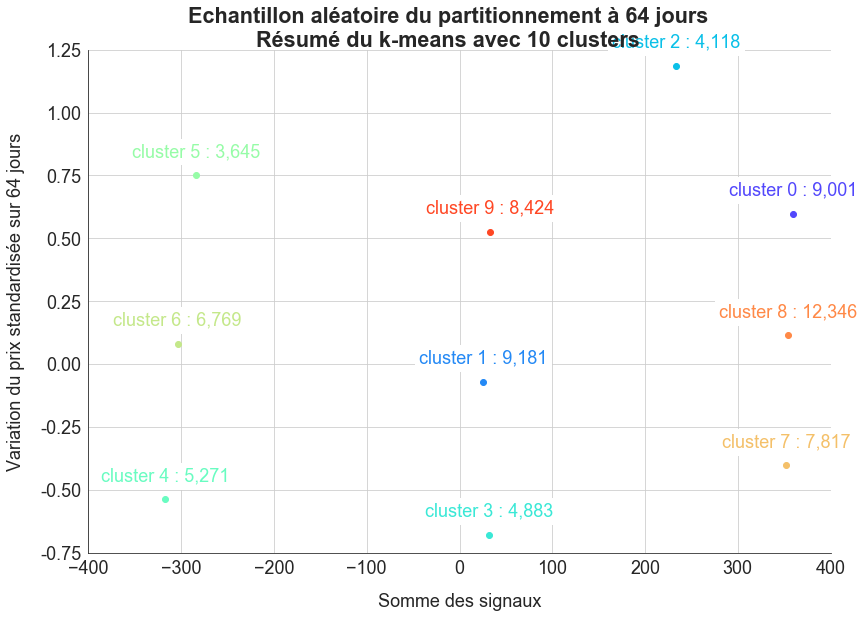

In [64]:
liste_10couleurs = sfg.set_rainbow_colors(nb_colors=10, gist=False)
graph56 = sfg.MyGraph(title="Echantillon aléatoire du partitionnement à 64 jours\nRésumé du k-means avec 10 clusters")
for i in np.arange(len(kmeans64.df_centroids)):
    graph56.add_plot(x_values=kmeans64.df_centroids.iloc[i].somme_signaux, \
                     y_values=kmeans64.df_centroids.iloc[i].variation_64_standard, \
                     label=kmeans64.df_centroids.index[i], color=liste_10couleurs[i], \
                      marker='o', linestyle='', with_grid='both')
    graph56.add_text(x_coord=kmeans64.df_centroids.iloc[i].somme_signaux, \
                     y_coord=kmeans64.df_centroids.iloc[i].variation_64_standard+0.13, \
                     text="{} : {:,.0f}".format(kmeans64.df_centroids.index[i],kmeans64.df_centroids.iloc[i].nombre_individus), \
                      color=liste_10couleurs[i], backgroundcolor=(1,1,1))
graph56.set_axe('x', label="Somme des signaux", tick_min=-400, tick_max=400)
graph56.set_axe('y', label="Variation du prix standardisée sur 64 jours", tick_min=-0.75, tick_max=1.25, tick_step=0.25, tick_labels_format=':.2f')
fig, ax = graph56.fig, graph56.ax
plt.savefig("M2_echantillon_aleatoire_kmeans64_10centroids.png")
plt.show()

In [65]:
temp = kmeans64.df_data_clusters.copy()
temp = temp.merge(echant1_data64[["top_cluster"]], how='left', left_index=True, right_index=True)
temp.head()

,,somme_signaux,variation_64_standard,cluster,top_cluster
contract_id,dateref,,,,
24,2014-05-28,330,-0.408090,7,False
7,2003-04-07,-356,0.275221,6,False
56,2010-09-21,-312,0.508660,5,False
21,2015-02-13,-322,0.604627,5,False
6,2007-09-25,-206,-0.048078,6,False


In [66]:
temp[temp.top_cluster==True].cluster.unique()

array([2, 0, 9], dtype=int64)

In [67]:
print("Nombre de données du top_cluster dans le cluster 7 : {}".format(\
        len(temp[(temp.cluster==7) & (temp.top_cluster==True)])))
print("Nombre d'autres données dans le cluster 7 : {}".format(\
        len(temp[(temp.cluster==7) & (temp.top_cluster==False)])))
print("Nombre de données du top_cluster dans d'autres clusters : {}".format(\
        len(temp[(temp.cluster!=7) & (temp.top_cluster==True)])))

Nombre de données du top_cluster dans le cluster 7 : 0
Nombre d'autres données dans le cluster 7 : 7817
Nombre de données du top_cluster dans d'autres clusters : 4321


Le cluster 7 de ce k-means est moins fidèle au top_cluster de notre k-means initial, par rapport aux cas des variations de prix à 1 ou 2 mois.  
Environ un quart des données initialement dans le top_cluster ont été remplacées par des données de 2 autres clusters.

<a id='2_2'></a>

## 2.2. Echantillonnage basée sur une connaissance métier

### 2.2.1. Choix de la période et génération des échantillons

Je choisis la période de 4 années qui va de 2014 à 2017. Cette période continue possède des particularités intéressantes pour notre analyse :  
- les années 2014 et 2015 sont très bonnes : 2014 est la troisième meilleure année historique depuis 1995 (et la meilleure sur les 15 denrières années) et le rendement de 2015 se situe 20% au-dessus du rendement annuel moyen ;  
- les années 2016 et 2017 sont au contraire mauvaises, le rendement de chacune de ces années étant inférieur à la moitié du rendement annuel moyen.  
  
Notre échantillon présentera ainsi deux sous-périodes distinctes : la première favorable à nos systèmes, la seconde défavorable.  
Comme j'étudie les variations sur 1 mois, 2 mois et 3 mois après la date des signaux, je vais décaler mes données d'un mois et demi pour "centrer" le décalage des données. Je conserve donc les données entre le 15 novembre 2013 et le 15 novembre 2017.

In [68]:
data21.reset_index(inplace=True)
echant2_data21 = data21[(data21.dateref>='2013-11-15') & (data21.dateref<='2017-11-15')].drop(columns='stratify')
echant2_data21.set_index(["contract_id", "dateref"], inplace=True)
echant2_data21.head()

category_name  somme_signaux  variation_21_standard  \
contract_id dateref                                                          
1           2013-11-15    Currencies            167              -0.439909   
            2013-11-18    Currencies            169              -0.505274   
            2013-11-19    Currencies            171              -0.634760   
            2013-11-20    Currencies            173              -0.537266   
            2013-11-21    Currencies            175              -0.362235   

                        cluster  top_cluster  
contract_id dateref                           
1           2013-11-15        6        False  
            2013-11-18        6        False  
            2013-11-19        5        False  
            2013-11-20        6        False  
            2013-11-21        6        False

In [69]:
data42.reset_index(inplace=True)
echant2_data42 = data42[(data42.dateref>='2013-11-15') & (data42.dateref<='2017-11-15')].drop(columns='stratify')
echant2_data42.set_index(["contract_id", "dateref"], inplace=True)
echant2_data42.head()

category_name  somme_signaux  variation_42_standard  \
contract_id dateref                                                          
1           2013-11-15    Currencies            167              -0.595471   
            2013-11-18    Currencies            169              -0.656479   
            2013-11-19    Currencies            171              -0.703792   
            2013-11-20    Currencies            173              -0.601488   
            2013-11-21    Currencies            175              -0.439233   

                        cluster  top_cluster  
contract_id dateref                           
1           2013-11-15        5        False  
            2013-11-18        5        False  
            2013-11-19        5        False  
            2013-11-20        5        False  
            2013-11-21        5        False

In [70]:
data64.reset_index(inplace=True)
echant2_data64 = data64[(data64.dateref>='2013-11-15') & (data64.dateref<='2017-11-15')].drop(columns='stratify')
echant2_data64.set_index(["contract_id", "dateref"], inplace=True)
echant2_data64.head()

category_name  somme_signaux  variation_64_standard  \
contract_id dateref                                                          
1           2013-11-15    Currencies            167              -0.316204   
            2013-11-18    Currencies            169              -0.324719   
            2013-11-19    Currencies            171              -0.415088   
            2013-11-20    Currencies            173              -0.308570   
            2013-11-21    Currencies            175              -0.234643   

                        cluster  top_cluster  
contract_id dateref                           
1           2013-11-15        4        False  
            2013-11-18        2        False  
            2013-11-19        2        False  
            2013-11-20        2        False  
            2013-11-21        4        False

### 2.2.2 Vérification de la répartition des signaux pour l'échantillon basé sur les dates

Les sommes de signaux sont les mêmes pour les 3 échantillons avec cette approche métier. En effet, nous avons gardé la même période pour analyser les variations de prix à 1 mois, 2 mois et 3 mois.  
L'analyse de la répartition des signaux est donc la même pour les 3 sous-échantillons.

In [71]:
print("Somme min = {}".format(echant2_data21.somme_signaux.min()))
print("Somme max = {}".format(echant2_data21.somme_signaux.max()))
print("Somme moyenne = {}".format(echant2_data21.somme_signaux.mean()))
print("Somme mediane = {}".format(echant2_data21.somme_signaux.median()))

Somme min = -438
Somme max = 449
Somme moyenne = 119.66222915720239
Somme mediane = 185.0


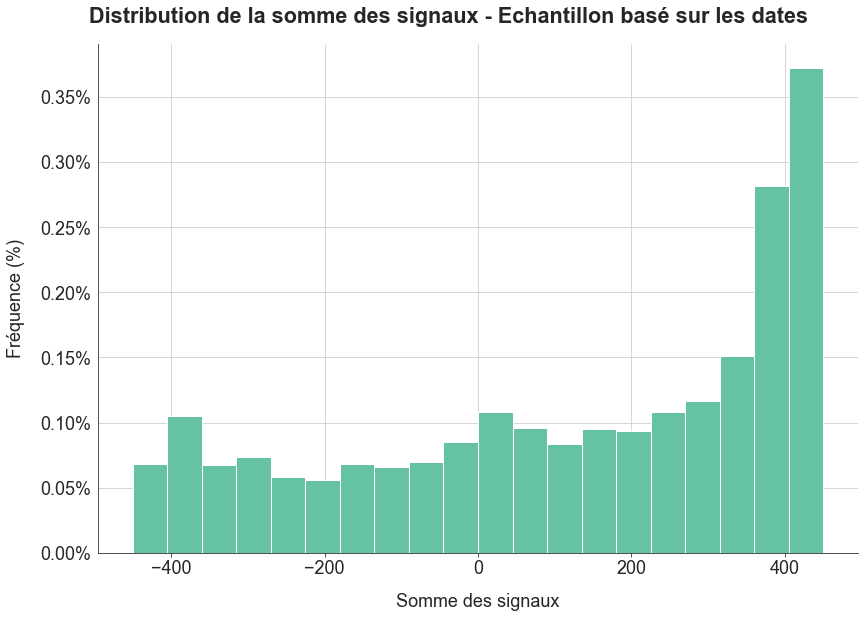

In [72]:
graph61 = sfg.MyGraph(title="Distribution de la somme des signaux - Echantillon basé sur les dates")
graph61.add_histogramme(echant2_data21.somme_signaux, range=(-450,450))
graph61.set_axe('x', label="Somme des signaux", tick_dash=True)
graph61.set_axe('y', label="Fréquence (%)", tick_labels_format=':.2%')
fig, ax = graph61.fig, graph61.ax
plt.savefig("M2_distribution_somme_signaux_dates.png")
plt.show()

Nous avons une sur-représentation des sommes très positives (> 350) et une sous-représentation des sommes légèrement positives (0 à 45) par rapport aux données initiales.  
Cela se traduit par une moyenne et une médiane supérieures par rapport aux données initiales.

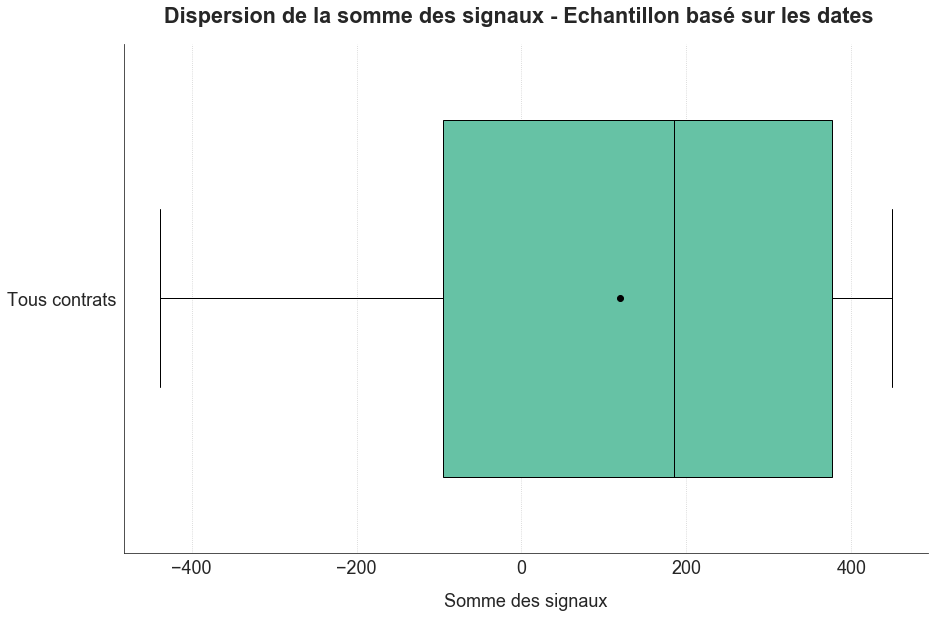

In [73]:
graph62 = sfg.MyGraph(title="Dispersion de la somme des signaux - Echantillon basé sur les dates")
graph62.add_boxplot(echant2_data21.somme_signaux, means=True, vertical=False)
graph62.set_axe('x', label="Somme des signaux")
graph62.set_axe('y', tick_labels=["Tous contrats"])
fig, ax = graph62.fig, graph62.ax
#plt.savefig("M2_dispersion_somme_signaux_dates.png")
plt.show()

La boite à moustache confirme la moyenne et la médiane supérieures pour cet échantillon.

In [74]:
interdata = echant2_data21.reset_index().groupby(["category_name","contract_id","somme_signaux"]).dateref.count().reset_index()
interdata.columns = ["category_name","contract_id","somme_signaux","nombre"]
interdata["bins"] = pd.cut(interdata.somme_signaux, [-450,-300,-150,0,150,300,450], include_lowest=True)
interdata.head()

,category_name,contract_id,somme_signaux,nombre,bins
0,Currencies,1,-402,2,"(-450.001, -300.0]"
1,Currencies,1,-401,3,"(-450.001, -300.0]"
2,Currencies,1,-400,3,"(-450.001, -300.0]"
3,Currencies,1,-399,9,"(-450.001, -300.0]"
4,Currencies,1,-398,1,"(-450.001, -300.0]"


In [75]:
graph_data = interdata.groupby(["category_name","contract_id","bins"]).nombre.sum().reset_index().sort_values(by=["category_name","contract_id","bins"])
graph_data["total"] = graph_data.groupby("contract_id").nombre.transform(pd.Series.sum)
graph_data["pourcentage_signaux"] = graph_data.nombre / graph_data.total
graph_data["pourcentage_cumule"] = graph_data.groupby("contract_id").pourcentage_signaux.cumsum()
graph_data = graph_data.merge(contracts[["name"]], how='left', left_on="contract_id", right_index=True)
graph_data.sort_values(by=["category_name","contract_id","bins"], inplace=True)
graph_data.head()

,category_name,contract_id,bins,nombre,total,pourcentage_signaux,pourcentage_cumule,name
0,Currencies,1,"(-450.001, -300.0]",147,1033,0.142304,0.142304,AUD
1,Currencies,1,"(-300.0, -150.0]",155,1033,0.150048,0.292352,AUD
2,Currencies,1,"(-150.0, 0.0]",246,1033,0.238141,0.530494,AUD
3,Currencies,1,"(0.0, 150.0]",218,1033,0.211036,0.741530,AUD
4,Currencies,1,"(150.0, 300.0]",181,1033,0.175218,0.916747,AUD


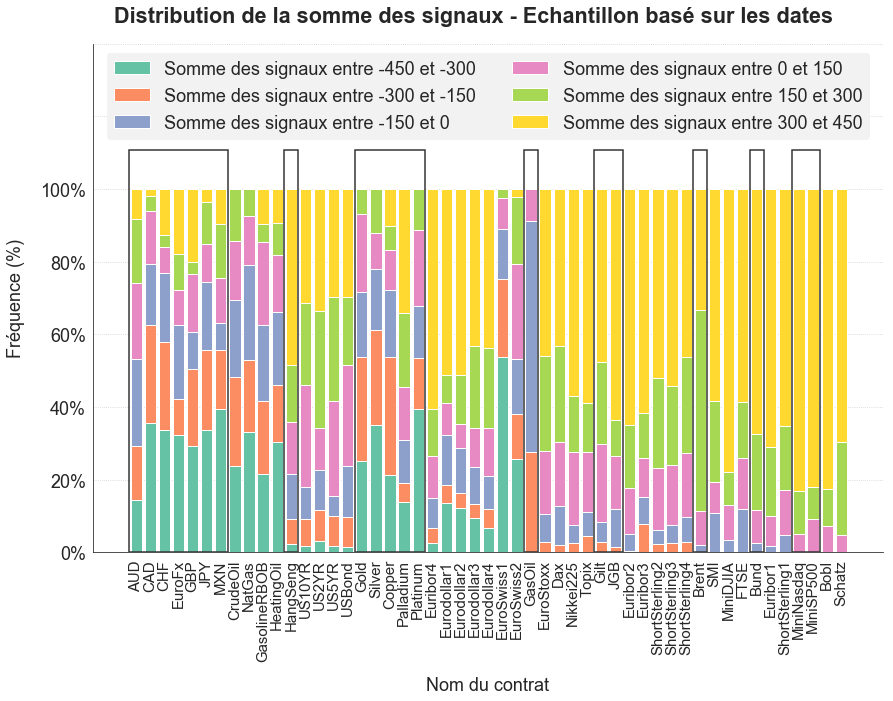

In [76]:
graph63 = sfg.MyGraph(title="Distribution de la somme des signaux - Echantillon basé sur les dates")
for mybin in graph_data.bins.unique():
    graph63.add_barv(x_values=graph_data[graph_data.bins==mybin].name, 
                     y_height=graph_data[graph_data.bins==mybin].pourcentage_signaux,
                     y_bottom=graph_data[graph_data.bins==mybin].pourcentage_cumule - graph_data[graph_data.bins==mybin].pourcentage_signaux,
                     label="Somme des signaux entre {:.0f} et {:.0f}".format(mybin.left, mybin.right))
graph63.add_rectangle(coord_min=-0.5, coord_max=6.5, rect_max=0.79, color=(0.2,0.2,0.2))
graph63.add_rectangle(coord_min=10.5, coord_max=11.5, rect_max=0.79, color=(0.2,0.2,0.2))
graph63.add_rectangle(coord_min=15.5, coord_max=20.5, rect_max=0.79, color=(0.2,0.2,0.2))
graph63.add_rectangle(coord_min=27.5, coord_max=28.5, rect_max=0.79, color=(0.2,0.2,0.2))
graph63.add_rectangle(coord_min=32.5, coord_max=34.5, rect_max=0.79, color=(0.2,0.2,0.2))
graph63.add_rectangle(coord_min=39.5, coord_max=40.5, rect_max=0.79, color=(0.2,0.2,0.2))
graph63.add_rectangle(coord_min=43.5, coord_max=44.5, rect_max=0.79, color=(0.2,0.2,0.2))
graph63.add_rectangle(coord_min=46.5, coord_max=48.5, rect_max=0.79, color=(0.2,0.2,0.2))
graph63.set_axe('x', label="Nom du contrat", rotation=90)
graph63.set_axe('y', label="Fréquence (%)", tick_min=0, tick_max=1.4, tick_labels=["0%","20%","40%","60%","80%","100%"," "," "])
graph63.set_legend(loc="upper center", ncol=2)
fig, ax = graph63.fig, graph63.ax
ax[0].tick_params(axis='x', labelsize=15)
plt.savefig("M2_distrib_somme_contrat_dates.png")
plt.show()

La distribution des sommes des signaux par contrat est très différente sur cette période de temps par rapport à la moyenne historique. Certains contrats n'ont à aucun moment une somme des signaux négative (Mini Nasdaq, Mini SP500, Bobl et Schatz).  
Ce graphique confirme que les sommes très positives sont sur-représentées sur cette période par rapport à la moyenne historique pour la plupart des contrats. A contrario, certains contrats présentent une sur-représentation des sommes très négatives.  
La structure des sommes des signaux paraît donc différente par rapport à ce qu'elle était en moyenne sur l'historique.

In [77]:
intercat = echant2_data21.reset_index().groupby(["category_name","dateref"]).somme_signaux.mean().reset_index()
intercat.columns = ["category_name","dateref","moyenne_somme_signaux"]

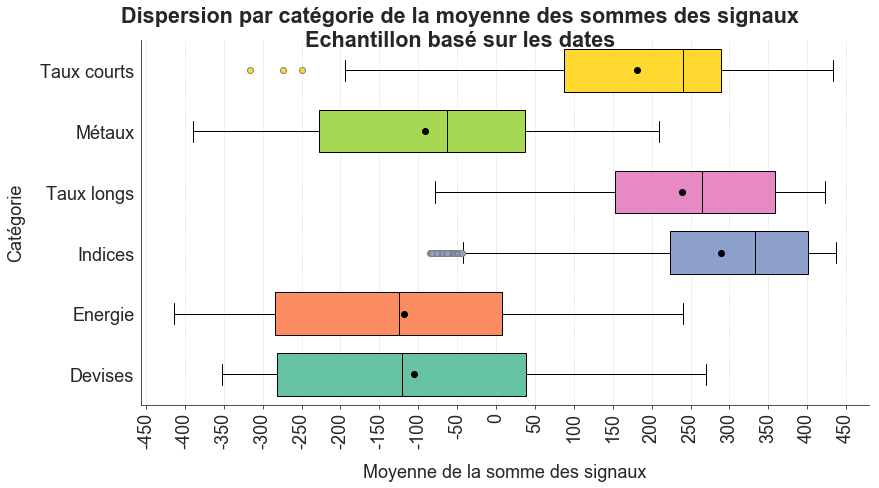

In [78]:
valeurs = [intercat[intercat.category_name==cat].moyenne_somme_signaux for cat in intercat.category_name.unique()]
graph64 = sfg.MyGraph(title="Dispersion par catégorie de la moyenne des sommes des signaux\nEchantillon basé sur les dates", figsize=(12,6))
graph64.add_boxplot(values=valeurs, cat_labels=intercat.category_name.unique(), means=True, vertical=False)
graph64.set_axe('x', label="Moyenne de la somme des signaux", tick_min=-450, tick_max=450, tick_step=50, tick_labels_format=':.0f', tick_dash=True, rotation=90)
graph64.set_axe('y', label="Catégorie", tick_labels=["Devises","Energie","Indices","Taux longs","Métaux","Taux courts"])
fig, ax = graph64.fig, graph64.ax
plt.savefig("M2_dispersion_moyenne_categorie_dates.png")
plt.show()

In [92]:
interdata = intercat.groupby(["category_name","moyenne_somme_signaux"]).dateref.count().reset_index()
interdata.columns = ["category_name","moyenne_somme_signaux","nombre"]
interdata["bins"] = pd.cut(interdata.moyenne_somme_signaux, [-450,-300,-150,0,150,300,450], include_lowest=True)
interdata.head()

,category_name,moyenne_somme_signaux,nombre,bins
0,Currencies,-351.857143,1,"(-450.001, -300.0]"
1,Currencies,-351.285714,1,"(-450.001, -300.0]"
2,Currencies,-349.714286,4,"(-450.001, -300.0]"
3,Currencies,-349.428571,1,"(-450.001, -300.0]"
4,Currencies,-349.285714,2,"(-450.001, -300.0]"


In [93]:
graph_data = interdata.groupby(["category_name","bins"]).nombre.sum().reset_index()
graph_data["total"] = graph_data.groupby("category_name").nombre.transform(pd.Series.sum)
graph_data["pourcentage_signaux"] = graph_data.nombre / graph_data.total
graph_data["pourcentage_cumule"] = graph_data.groupby("category_name").pourcentage_signaux.cumsum()
graph_data.head()

,category_name,bins,nombre,total,pourcentage_signaux,pourcentage_cumule
0,Currencies,"(-450.001, -300.0]",166,1033,0.160697,0.160697
1,Currencies,"(-300.0, -150.0]",302,1033,0.292352,0.453049
2,Currencies,"(-150.0, 0.0]",233,1033,0.225557,0.678606
3,Currencies,"(0.0, 150.0]",234,1033,0.226525,0.905131
4,Currencies,"(150.0, 300.0]",98,1033,0.094869,1.000000


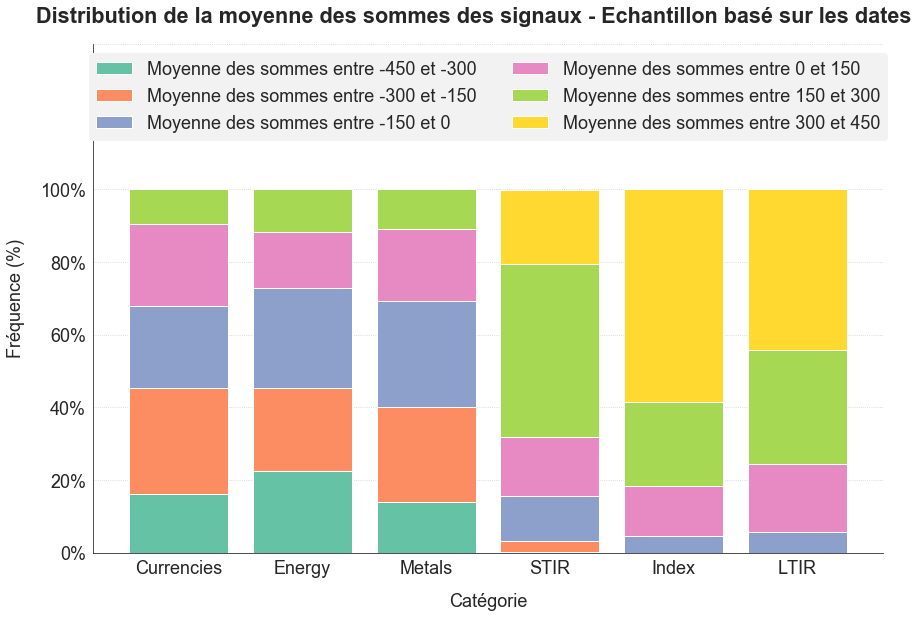

In [94]:
graph65 = sfg.MyGraph(title="Distribution de la moyenne des sommes des signaux - Echantillon basé sur les dates")
for mybin in graph_data.bins.unique():
    graph65.add_barv(x_values=graph_data[graph_data.bins==mybin].category_name, 
                     y_height=graph_data[graph_data.bins==mybin].pourcentage_signaux,
                     y_bottom=graph_data[graph_data.bins==mybin].pourcentage_cumule - graph_data[graph_data.bins==mybin].pourcentage_signaux,
                     label="Moyenne des sommes entre {:.0f} et {:.0f}".format(mybin.left, mybin.right))
graph65.set_axe('x', label="Catégorie")
graph65.set_axe('y', label="Fréquence (%)", tick_min=0, tick_max=1.4, tick_labels=["0%","20%","40%","60%","80%","100%"," "," "])
graph65.set_legend(loc="upper center", ncol=2)
fig, ax = graph65.fig, graph65.ax
#plt.savefig("M2_distrib_moyenne_categorie_dates.png")
plt.show()

Les graphiques d'analyse des moyennes de signaux par catégorie confirment la structure différente des données sur la période sélectionnée.  
D'une part, les classes d'actif des devises, de l'énergie et des métaux n'ont aucune moyenne des signaux supérieure à 300 et exhibent une large sous-représentation des sommes positives et une large sur-représentation des sommes négatives par rapport à la moyenne historique.  
A l'inverse, les taux d'intérêt à court-terme (STIR), et plus encore les taux d'intérêt à long-terme (STIR) et les indices boursiers, montrent une large sur-représentation des valeurs positives et très positives par rapport à la moyenne historique.

**Vérification des classifications k-means obtenues**

**Evolution à 1 mois**

In [95]:
data_classif = echant2_data21[["somme_signaux","variation_21_standard"]].dropna()
kmeans21b = sfca.ClassificationKmeans(data_classif)
kmeans21b.calculate_kmeans(n_clust_min=9, n_clust_max=11)
kmeans21b.define_n_clusters(10)
kmeans21b.calculate_clusters_centroids()
resultats_kmeans21b = kmeans21b.df_data_clusters.copy()

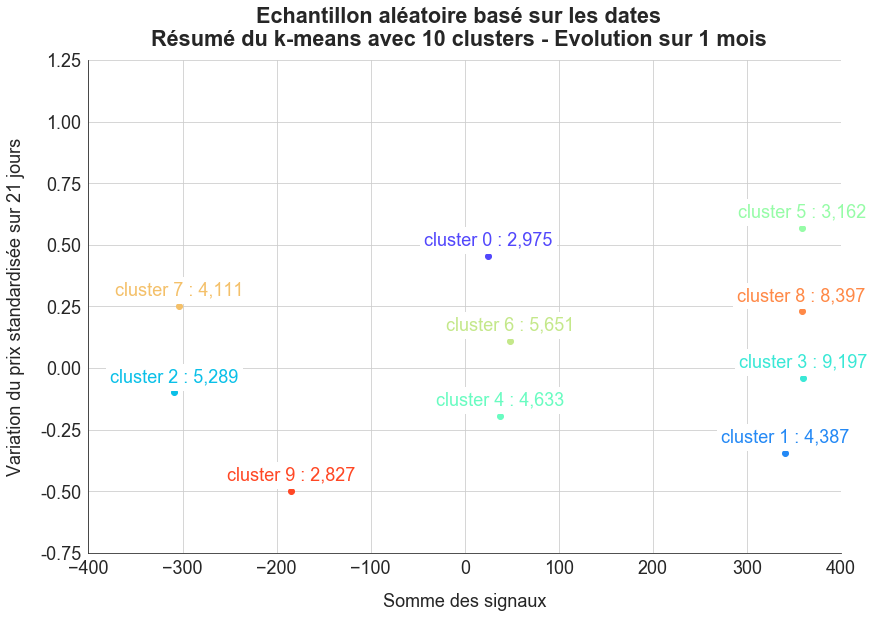

In [96]:
graph66 = sfg.MyGraph(title="Echantillon aléatoire basé sur les dates\nRésumé du k-means avec 10 clusters - Evolution sur 1 mois")
for i in np.arange(len(kmeans21b.df_centroids)):
    graph66.add_plot(x_values=kmeans21b.df_centroids.iloc[i].somme_signaux, \
                     y_values=kmeans21b.df_centroids.iloc[i].variation_21_standard, \
                     label=kmeans21b.df_centroids.index[i], color=liste_10couleurs[i], \
                      marker='o', linestyle='', with_grid='both')
    graph66.add_text(x_coord=kmeans21b.df_centroids.iloc[i].somme_signaux, \
                     y_coord=kmeans21b.df_centroids.iloc[i].variation_21_standard+0.12, \
                     text="{} : {:,.0f}".format(kmeans21b.df_centroids.index[i],kmeans21b.df_centroids.iloc[i].nombre_individus), \
                      color=liste_10couleurs[i], backgroundcolor=(1,1,1))
graph66.set_axe('x', label="Somme des signaux", tick_min=-400, tick_max=400)
graph66.set_axe('y', label="Variation du prix standardisée sur 21 jours", tick_min=-0.75, tick_max=1.25, tick_step=0.25, tick_labels_format=':.2f')
fig, ax = graph66.fig, graph66.ax
plt.savefig("M2_dates_kmeans21b_10centroids.png")
plt.show()

Sur l'évolution à 1 mois, on constate une répartition à peu près identique dans les sommes positives.  
Par contre, dans les sommes négatives, le cluster 9 qui représente les positions bénéficiaires est décalé vers la droite (somme des signaux moins négatives). Il a une taille plus petite que le cluster déficitaire 7, ce qui est compensé par une variation future du prix dans le sens anticipé deux fois plus importante.

In [97]:
temp = kmeans21b.df_data_clusters.copy()
temp = temp.merge(echant2_data21[["top_cluster"]], how='left', left_index=True, right_index=True)
temp.head()

somme_signaux  variation_21_standard  cluster  \
contract_id dateref                                                     
1           2013-11-15            167              -0.439909        1   
            2013-11-18            169              -0.505274        1   
            2013-11-19            171              -0.634760        1   
            2013-11-20            173              -0.537266        1   
            2013-11-21            175              -0.362235        1   

                        top_cluster  
contract_id dateref                  
1           2013-11-15        False  
            2013-11-18        False  
            2013-11-19        False  
            2013-11-20        False  
            2013-11-21        False

In [98]:
temp[temp.top_cluster==True].cluster.unique()

array([0, 5], dtype=int64)

In [99]:
print("Nombre de données du top_cluster dans le cluster 5 : {}".format(\
        len(temp[(temp.cluster==5) & (temp.top_cluster==True)])))
print("Nombre d'autres données dans le cluster 5 : {}".format(\
        len(temp[(temp.cluster==5) & (temp.top_cluster==False)])))
print("Nombre de données du top_cluster dans d'autres clusters : {}".format(\
        len(temp[(temp.cluster!=5) & (temp.top_cluster==True)])))

Nombre de données du top_cluster dans le cluster 5 : 2549
Nombre d'autres données dans le cluster 5 : 613
Nombre de données du top_cluster dans d'autres clusters : 97


Le cluster 5 de ce k-means représente assez bien le top_cluster de notre k-means initial. Cependant, on note la présence d'un quart de données "parasites" dans ce cluster 5, c'est-à-dire initialement non présentes dans le top cluster.  
L'aspect plus important est que très peu d'éléments du top_cluster initial ne sont pas dans le cluster 5.

**Evolution à 2 mois**

In [100]:
data_classif = echant2_data42[["somme_signaux","variation_42_standard"]].dropna()
kmeans42b = sfca.ClassificationKmeans(data_classif)
kmeans42b.calculate_kmeans(n_clust_min=9, n_clust_max=11)
kmeans42b.define_n_clusters(10)
kmeans42b.calculate_clusters_centroids()
resultats_kmeans42b = kmeans42b.df_data_clusters.copy()

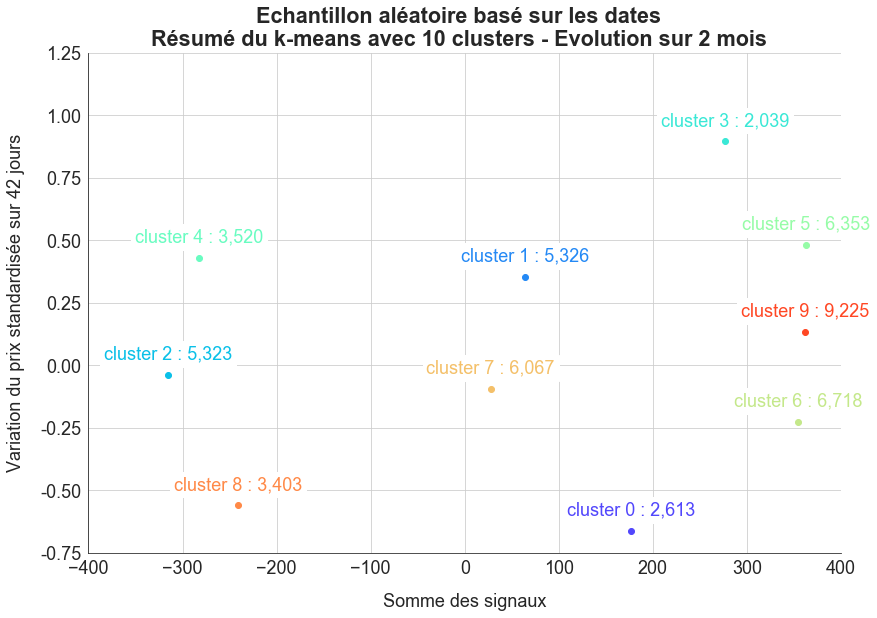

In [102]:
graph67 = sfg.MyGraph(title="Echantillon aléatoire basé sur les dates\nRésumé du k-means avec 10 clusters - Evolution sur 2 mois")
for i in np.arange(len(kmeans42b.df_centroids)):
    graph67.add_plot(x_values=kmeans42b.df_centroids.iloc[i].somme_signaux, \
                     y_values=kmeans42b.df_centroids.iloc[i].variation_42_standard, \
                     label=kmeans42b.df_centroids.index[i], color=liste_10couleurs[i], \
                      marker='o', linestyle='', with_grid='both')
    graph67.add_text(x_coord=kmeans42b.df_centroids.iloc[i].somme_signaux, \
                     y_coord=kmeans42b.df_centroids.iloc[i].variation_42_standard+0.12, \
                     text="{} : {:,.0f}".format(kmeans42b.df_centroids.index[i],kmeans42b.df_centroids.iloc[i].nombre_individus), \
                      color=liste_10couleurs[i], backgroundcolor=(1,1,1))
graph67.set_axe('x', label="Somme des signaux", tick_min=-400, tick_max=400)
graph67.set_axe('y', label="Variation du prix standardisée sur 42 jours", tick_min=-0.75, tick_max=1.25, tick_step=0.25, tick_labels_format=':.2f')
fig, ax = graph67.fig, graph67.ax
plt.savefig("M2_dates_kmeans42b_10centroids.png")
plt.show()

Sur l'évolution à 2 mois, il n'y a pas plus que deux clusters correspndant à des positions nulles. Le cluster 0 s'est décalé vers une somme de signaux positive. Il représente des positions assez fortement perdantes. Cependant, l'ampleur de la variation future négative du prix est moindre que l'ampleur de la variation future positive du prix du cluster 3 (qui regroupe les positions super gagnantes).  
Le décalage de ce cluster 3 explique en partie la moins bonne performance du système sur cette période.

In [103]:
temp = kmeans42b.df_data_clusters.copy()
temp = temp.merge(echant2_data42[["top_cluster"]], how='left', left_index=True, right_index=True)
temp.head()

somme_signaux  variation_42_standard  cluster  \
contract_id dateref                                                     
1           2013-11-15            167              -0.595471        0   
            2013-11-18            169              -0.656479        0   
            2013-11-19            171              -0.703792        0   
            2013-11-20            173              -0.601488        0   
            2013-11-21            175              -0.439233        0   

                        top_cluster  
contract_id dateref                  
1           2013-11-15        False  
            2013-11-18        False  
            2013-11-19        False  
            2013-11-20        False  
            2013-11-21        False

In [104]:
temp[temp.top_cluster==True].cluster.unique()

array([3], dtype=int64)

In [106]:
print("Nombre de données du top_cluster dans le cluster 3 : {}".format(\
        len(temp[(temp.cluster==3) & (temp.top_cluster==True)])))
print("Nombre d'autres données dans le cluster 3 : {}".format(\
        len(temp[(temp.cluster==3) & (temp.top_cluster==False)])))
print("Nombre de données du top_cluster dans d'autres clusters : {}".format(\
        len(temp[(temp.cluster!=3) & (temp.top_cluster==True)])))

Nombre de données du top_cluster dans le cluster 3 : 1722
Nombre d'autres données dans le cluster 3 : 317
Nombre de données du top_cluster dans d'autres clusters : 0


Le cluster 3 de ce k-means représente bien le top_cluster de notre k-means initial puisqu'il regroupe toutes ses données.

**Evolution à 3 mois**

In [107]:
data_classif = echant2_data64[["somme_signaux","variation_64_standard"]].dropna()
kmeans64b = sfca.ClassificationKmeans(data_classif)
kmeans64b.calculate_kmeans(n_clust_min=9, n_clust_max=11)
kmeans64b.define_n_clusters(10)
kmeans64b.calculate_clusters_centroids()
resultats_kmeans64b = kmeans64b.df_data_clusters.copy()

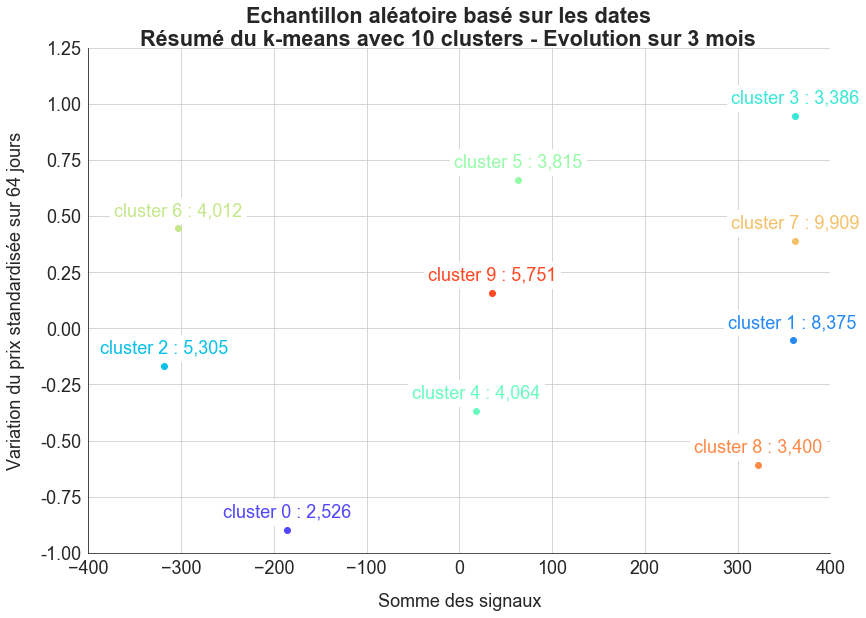

In [108]:
graph68 = sfg.MyGraph(title="Echantillon aléatoire basé sur les dates\nRésumé du k-means avec 10 clusters - Evolution sur 3 mois")
for i in np.arange(len(kmeans64b.df_centroids)):
    graph68.add_plot(x_values=kmeans64b.df_centroids.iloc[i].somme_signaux, \
                     y_values=kmeans64b.df_centroids.iloc[i].variation_64_standard, \
                     label=kmeans64b.df_centroids.index[i], color=liste_10couleurs[i], \
                      marker='o', linestyle='', with_grid='both')
    graph68.add_text(x_coord=kmeans64b.df_centroids.iloc[i].somme_signaux, \
                     y_coord=kmeans64b.df_centroids.iloc[i].variation_64_standard+0.12, \
                     text="{} : {:,.0f}".format(kmeans64b.df_centroids.index[i],kmeans64b.df_centroids.iloc[i].nombre_individus), \
                      color=liste_10couleurs[i], backgroundcolor=(1,1,1))
graph68.set_axe('x', label="Somme des signaux", tick_min=-400, tick_max=400)
graph68.set_axe('y', label="Variation du prix standardisée sur 64 jours", tick_min=-1.0, tick_max=1.25, tick_step=0.25, tick_labels_format=':.2f')
fig, ax = graph68.fig, graph68.ax
plt.savefig("M2_dates_kmeans64b_10centroids.png")
plt.show()

Sur l'évolution à 3 mois, on retroube une configuration similaire à celle observée pour l'évolution à 1 mois des prix.

In [109]:
temp = kmeans64b.df_data_clusters.copy()
temp = temp.merge(echant2_data64[["top_cluster"]], how='left', left_index=True, right_index=True)
temp.head()

somme_signaux  variation_64_standard  cluster  \
contract_id dateref                                                     
1           2013-11-15            167              -0.316204        4   
            2013-11-18            169              -0.324719        4   
            2013-11-19            171              -0.415088        4   
            2013-11-20            173              -0.308570        4   
            2013-11-21            175              -0.234643        4   

                        top_cluster  
contract_id dateref                  
1           2013-11-15        False  
            2013-11-18        False  
            2013-11-19        False  
            2013-11-20        False  
            2013-11-21        False

In [110]:
temp[temp.top_cluster==True].cluster.unique()

array([3, 5], dtype=int64)

In [111]:
print("Nombre de données du top_cluster dans le cluster 3 : {}".format(\
        len(temp[(temp.cluster==3) & (temp.top_cluster==True)])))
print("Nombre d'autres données dans le cluster 3 : {}".format(\
        len(temp[(temp.cluster==3) & (temp.top_cluster==False)])))
print("Nombre de données du top_cluster dans d'autres clusters : {}".format(\
        len(temp[(temp.cluster!=3) & (temp.top_cluster==True)])))

Nombre de données du top_cluster dans le cluster 3 : 1544
Nombre d'autres données dans le cluster 3 : 1842
Nombre de données du top_cluster dans d'autres clusters : 283


Le cluster 3 est moyennement représentatif du top_cluster initial. Plus de la moitié des données présentes dans le cluster 3 n'appartiennent pas au top_cluster initial.

**Comparaison des tailles des échantillons**

In [112]:
print(len(echant1_data21))
print(len(echant1_data42))
print(len(echant1_data64))

71893
71679
71455


In [113]:
print(len(echant2_data21))
print(len(echant2_data42))
print(len(echant2_data64))

50629
50587
50543


A noter qu'il y a environ 40% de données en plus dans les échantillons basés sur les clusters par rapport aux échantillons basés sur les dates.

Il sera intéressant de réaliser deux modélisations différentes puis de les comparer. La première sera basée sur les échantillons représentatifs de la moyenne historique. La deuxième sera basée sur la période de 2014 à 2017.

<a id='2_3'></a>

## 2.3. Sauvegarde des échantillons

In [114]:
echant1_data21.to_csv("echant_random_data21.csv")
echant1_data42.to_csv("echant_random_data42.csv")
echant1_data64.to_csv("echant_random_data64.csv")

In [115]:
echant2_data21.to_csv("echant_annees_data21.csv")
echant2_data42.to_csv("echant_annees_data42.csv")
echant2_data64.to_csv("echant_annees_data64.csv")